We are studying inflammation in patients who have been given a new treatment for arthritis, and need to analyze the first dozen data sets of their daily inflammation. The data sets are stored in comma-separated values (CSV) format: each row holds information for a single patient, and the columns represent successive days. The first few rows of our first file look like this:

0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1

We want to:

load that data into memory,
calculate the average inflammation per day across all patients, and
plot the result.


In [ ]:
### 

### Loading the data

In [8]:
setwd("r-novice-inflammation/")

Alternatively you can change the working directory using the RStudio GUI using the menu option Session -> Set Working Directory -> Choose Directory...

In [10]:
read.csv(file = "data/inflammation-01.csv", header = FALSE)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,0,1,3,1,2,4,7,8,3,⋯,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,⋯,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,⋯,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,⋯,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,⋯,9,6,3,2,2,4,2,0,1,1
0,0,1,2,2,4,2,1,6,4,⋯,8,4,7,3,5,4,4,3,2,1
0,0,2,2,4,2,2,5,5,8,⋯,8,8,4,2,3,5,4,1,1,1
0,0,1,2,3,1,2,3,5,3,⋯,4,9,3,5,2,5,3,2,2,1
0,0,0,3,1,5,6,5,5,8,⋯,4,6,4,7,6,3,2,1,0,0
0,1,1,2,1,3,5,3,5,8,⋯,2,5,4,5,1,4,1,2,0,0


read.csv has two arguments: the name of the file we want to read, and whether the first line of the file contains names for the columns of data. The default value for header is TRUE

In [12]:
?read.csv #A pop-up will provide the description or u can write help(read.csv)

Depending on the country you live in, your standard can use the dot or the comma as decimal mark. Also, different devices or software can generate data with different decimal points. 

In [18]:
weight_kg <- 57.5 #creating new variable
weight_kg

[1] 57.5

Historically, R programmers have used a variety of conventions for naming variables. The . character in R can be a valid part of a variable name; thus the above assignment could have easily been weight.kg <- 57.5. This is often confusing to R newcomers who have programmed in languages where . has a more significant meaning. Today, most R programmers 1) start variable names with lower case letters, 2) separate words in variable names with underscores, and 3) use only lowercase letters, underscores, and numbers in variable names. 

In [19]:
weight_lb <- 2.2 * weight_kg
weight_lb

[1] 126.5

In words, we’re asking R to look up the value we tagged weight_kg, multiply it by 2.2, and tag the result with the name weight_lb:



In [20]:
weight_kg <- 100

In [21]:
weight_lb

[1] 126.5

An alternative way to print the value of a variable is to use () around the assignment statement. As an example: (total_weight <- weight_kg + weight_lb) adds the values of weight_kg and weight_lb, assigns the result to the total_weight, and finally prints the assigned value of the variable total_weight.

In [22]:
dat <- read.csv(file = "data/inflammation-01.csv", header = FALSE)

In [23]:
head(dat)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,0,1,3,1,2,4,7,8,3,⋯,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,⋯,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,⋯,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,⋯,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,⋯,9,6,3,2,2,4,2,0,1,1
0,0,1,2,2,4,2,1,6,4,⋯,8,4,7,3,5,4,4,3,2,1


Now that our data are loaded into R, we can start doing things with them. First, let’s ask what type of thing dat is:

In [24]:
class(dat)

[1] "data.frame"

A typical data frame of experimental data contains individual observations in rows and variables in columns.

dim(dat)This tells us that our data frame, dat, has 60 rows and 40 columns.)

In [26]:
dim(dat)

[1] 60 40

In [29]:
dat[1, 1] #The first number specifies the row and the second the column:

[1] 0

The first value in a data frame index is the row, the second value is the column. If we want to select more than one row or column, we can use the function c, which stands for combine. For example, to pick columns 10 and 20 from rows 1, 3, and 5, we can do this:

In [31]:
dat[c(1,3,5), c(10,20)]

,V10,V20
1,3,18
3,9,10
5,4,17


We frequently want to select contiguous rows or columns, such as the first ten rows, or columns 3 through 7. You can use c for this, but it’s more convenient to use the : operator. This special function generates sequences of numbers:

In [32]:
1:5

[1] 1 2 3 4 5

In [33]:
3:12

[1]  3  4  5  6  7  8  9 10 11 12

In [34]:
dat[1:4, 1:10]

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0,1,3,1,2,4,7,8,3
0,1,2,1,2,1,3,2,2,6
0,1,1,3,3,2,6,2,5,9
0,0,2,0,4,2,2,1,6,7


If you want to select all rows or all columns, leave that index value empty.

In [38]:
dat[5,] # All columns from row 5

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
5,0,1,1,3,3,1,3,5,2,4,⋯,9,6,3,2,2,4,2,0,1,1


In [39]:
# All rows from column 16-18
dat[, 16:18] 


V16,V17,V18
4,7,7
4,7,16
15,5,11
8,15,10
10,8,10
15,4,16
13,5,12
9,15,11
11,9,10
6,13,8


If you leave both index values empty (i.e., dat[,]), you get the entire data frame.

Columns can also be addressed by name, with either the \$ operator (ie. dat\$V16) or square brackets (ie. dat[, 'V16']).

In [40]:
dat$V16

[1]  4  4 15  8 10 15 13  9 11  6  3  8 12  3  5 10 11  4 11 13 15  5 14 13  4
[26]  9 13  6  7  6 14  3 15  4 15 11  7 10 15  6  5  6 15 11 15  6 11 15 14  4
[51] 10 15 11  6 13  8  4 13 12  9

In [43]:
dat[,'V16'] #notice in string form

[1]  4  4 15  8 10 15 13  9 11  6  3  8 12  3  5 10 11  4 11 13 15  5 14 13  4
[26]  9 13  6  7  6 14  3 15  4 15 11  7 10 15  6  5  6 15 11 15  6 11 15 14  4
[51] 10 15 11  6 13  8  4 13 12  9

In [44]:
# first row, all of the columns
patient_1 <- dat[1, ]
# max inflammation for patient 1
max(patient_1)

[1] 18

In [45]:
#we can directly write
max(dat[2,])

[1] 18

In [47]:
#minimum imflammation on day 7
min(dat[,7])

[1] 1

In [48]:
mean(dat[,7])

[1] 3.8

In [49]:
median(dat[,7])

[1] 4

In [50]:
#standard deviation on day 7
sd(dat[,7])

[1] 1.725187

Note that R may return an error when you attempt to perform similar calculations on sliced rows of data frames. This is because some functions in R automatically convert the object type to a numeric vector, while others do not (e.g. max(dat[1, ]) works as expected, while mean(dat[1, ]) returns an error). You can fix this by including an explicit call to as.numeric(), e.g. mean(as.numeric(dat[1, ])). By contrast, calculations on sliced columns always work as expected, since columns of data frames are already defined as vectors.

In [51]:
#Summarize function
summary(dat[,1:4])

       V1          V2             V3              V4      
 Min.   :0   Min.   :0.00   Min.   :0.000   Min.   :0.00  
 1st Qu.:0   1st Qu.:0.00   1st Qu.:1.000   1st Qu.:1.00  
 Median :0   Median :0.00   Median :1.000   Median :2.00  
 Mean   :0   Mean   :0.45   Mean   :1.117   Mean   :1.75  
 3rd Qu.:0   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:3.00  
 Max.   :0   Max.   :1.00   Max.   :2.000   Max.   :3.00  

What if we need the maximum inflammation for all patients, or the average for each day? As the diagram below shows, we want to perform the operation across a margin of the data frame

To support this, we can use the apply function.

In [52]:
?apply

mapply allows us to repeat a function on all of the rows (MARGIN = 1) or columns (MARGIN = 2) of a data frame.

Thus, to obtain the average inflammation of each patient we will need to calculate the mean of all of the rows (MARGIN = 1) of the data frame.



In [53]:
avg_patient_inflammation <- apply(dat, 1 , mean)


In [55]:
max(avg_patient_inflammation)

[1] 7.225

In [56]:
average_day_inflammation <- apply(dat, 2, mean)

In [61]:
max(average_day_inflammation)

[1] 13.25

In [63]:
which.max(average_day_inflammation)

V21 
 21

In [64]:
average_day_inflammation

V1         V2         V3         V4         V5         V6         V7 
 0.0000000  0.4500000  1.1166667  1.7500000  2.4333333  3.1500000  3.8000000 
        V8         V9        V10        V11        V12        V13        V14 
 3.8833333  5.2333333  5.5166667  5.9500000  5.9000000  8.3500000  7.7333333 
       V15        V16        V17        V18        V19        V20        V21 
 8.3666667  9.5000000  9.5833333 10.6333333 11.5666667 12.3500000 13.2500000 
       V22        V23        V24        V25        V26        V27        V28 
11.9666667 11.0333333 10.1666667 10.0000000  8.6666667  9.1500000  7.2500000 
       V29        V30        V31        V32        V33        V34        V35 
 7.3333333  6.5833333  6.0666667  5.9500000  5.1166667  3.6000000  3.3000000 
       V36        V37        V38        V39        V40 
 3.5666667  2.4833333  1.5000000  1.1333333  0.5666667

Some common operations have more efficient alternatives. For example, you can calculate the row-wise or column-wise means with rowMeans and colMeans, respectively.


In [66]:
animal <- c("m", "o", "n", "k", "e", "y")
animal[1:3]

[1] "m" "o" "n"

In [67]:
animal[-1]

[1] "o" "n" "k" "e" "y"

In [68]:
animal[-4]

[1] "m" "o" "n" "e" "y"

In [69]:
animal[-1:-4]

[1] "e" "y"

you want to determine the maximum inflammation for patient 5 across days three to seven. 

In [70]:
max(dat[5, 3:7])

[1] 3

Using the inflammation data frame dat from above: Let’s pretend there was something wrong with the instrument on the first five days for every second patient (#2, 4, 6, etc.), which resulted in the measurements being twice as large as they should be.

In [71]:
?seq

In [73]:
seq(2, 60, 2)

[1]  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50
[26] 52 54 56 58 60

In [80]:
?dim

In [81]:
dim(dat)

[1] 60 40

In [82]:
dim(dat)[1]

[1] 60

In [83]:
seq(2, dim(dat)[1], 2)

[1]  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50
[26] 52 54 56 58 60

In [84]:
new_df = dat[seq(2, dim(dat)[1], 2), 1:5]

In [85]:
head(new_df)

,V1,V2,V3,V4,V5
2,0,1,2,1,2
4,0,0,2,0,4
6,0,0,1,2,2
8,0,0,1,2,3
10,0,1,1,2,1
12,0,1,0,0,3


In [90]:
Q1 <- apply(dat[1:5,1:40],1,mean)

In [91]:
Q1

1     2     3     4     5 
5.450 5.425 6.100 5.900 5.550

In [94]:
Q2 <- apply(dat[,1:10],2,mean)

In [95]:
Q2

V1       V2       V3       V4       V5       V6       V7       V8 
0.000000 0.450000 1.116667 1.750000 2.433333 3.150000 3.800000 3.883333 
      V9      V10 
5.233333 5.516667

In [96]:
Q3 <- apply(dat[,seq(2,dim(dat)[2],2)],2,mean)

In [97]:
Q3

V2         V4         V6         V8        V10        V12        V14 
 0.4500000  1.7500000  3.1500000  3.8833333  5.5166667  5.9000000  7.7333333 
       V16        V18        V20        V22        V24        V26        V28 
 9.5000000 10.6333333 12.3500000 11.9666667 10.1666667  8.6666667  7.2500000 
       V30        V32        V34        V36        V38        V40 
 6.5833333  5.9500000  3.6000000  3.5666667  1.5000000  0.5666667

Let’s take a look at the average inflammation over time. Recall that we already calculated these values above using apply(dat, 2, mean) and saved them in the variable avg_day_inflammation. Plotting the values is done with the function plot.

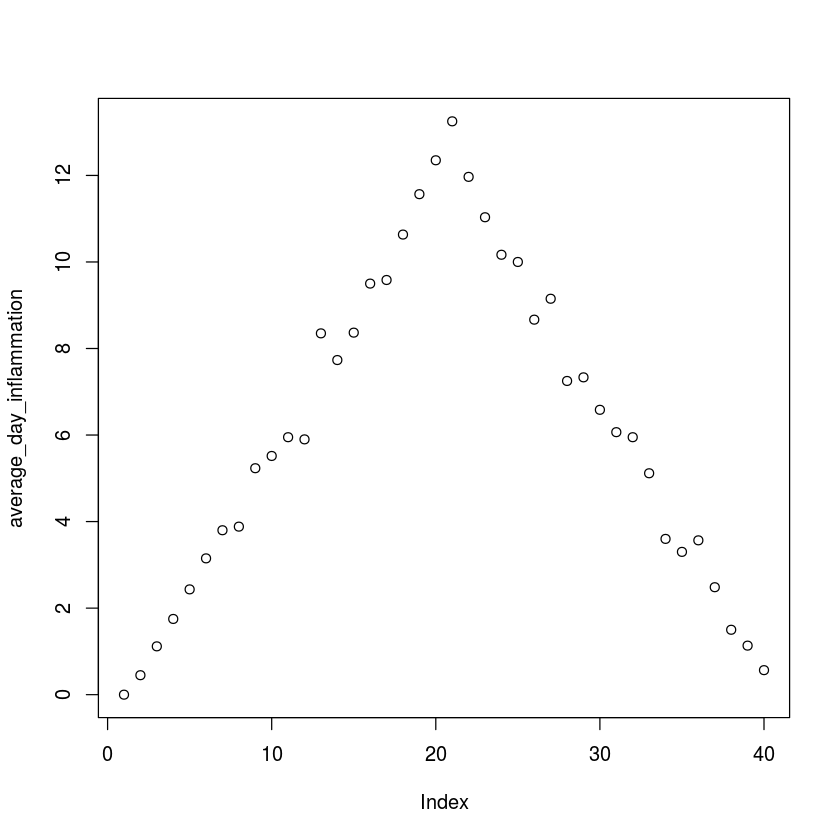

In [98]:
plot(average_day_inflammation)

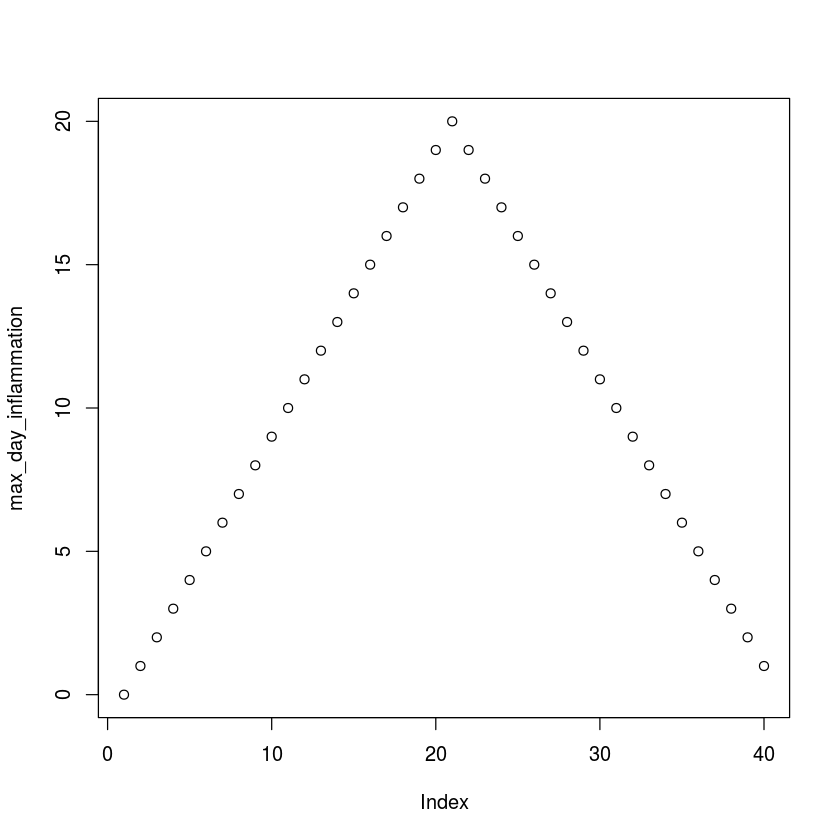

In [99]:
max_day_inflammation <- apply(dat, 2, max)
plot(max_day_inflammation)

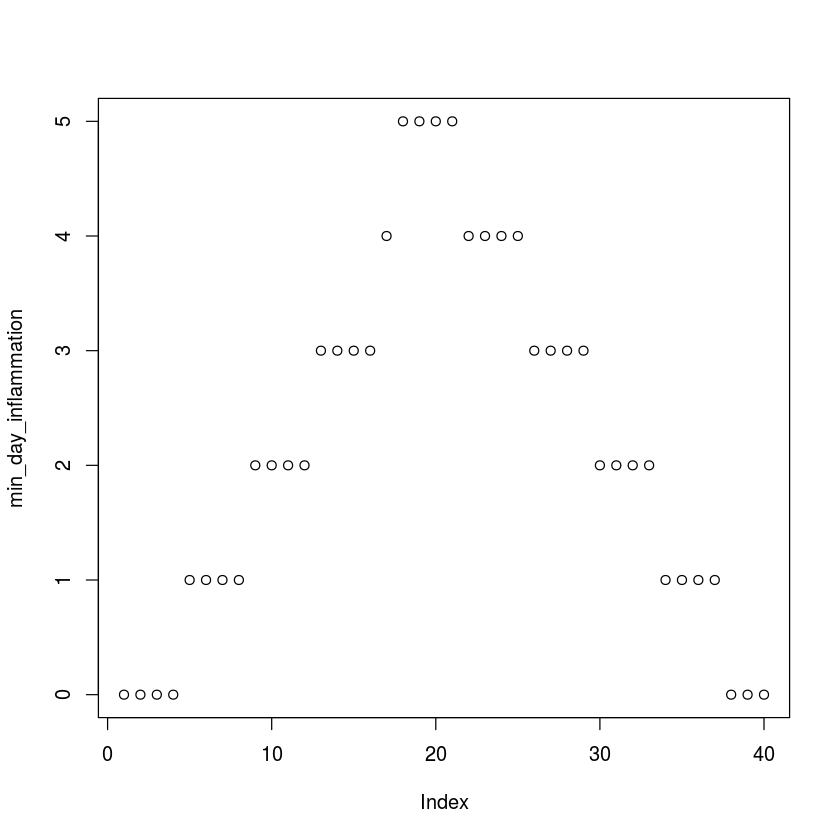

In [100]:
min_day_inflammation <- apply(dat, 2, min)
plot(min_day_inflammation)

In [101]:
sd_each_day <- apply(dat, 2 , sd)

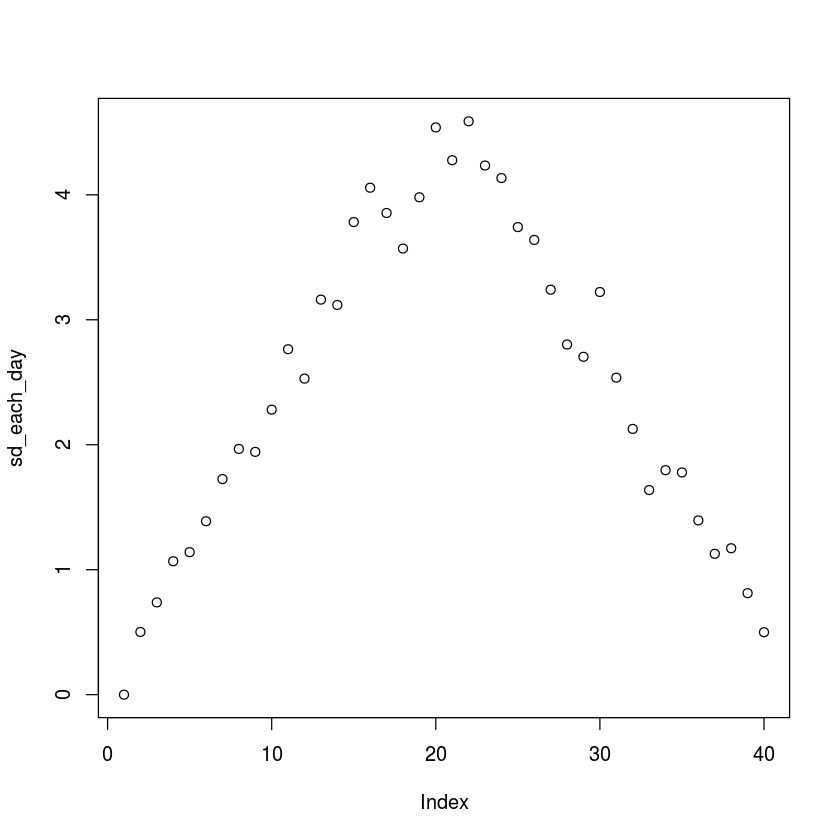

In [102]:
plot(sd_each_day)

### Defining a function

In [103]:
farenheit_to_kelvin <- function(temp_F)
    {
    temp_K = ((temp_F - 32) * (5 / 9)) + 273.15
    return (temp_K)
}

In [104]:
farenheit_to_kelvin(98)

[1] 309.8167

In R it is not necessary to include the return statement. R automatically return whatever is in the last line the function

In [105]:
#freezing point of water
farenheit_to_kelvin(32)

[1] 273.15

In [106]:
#boiling point of water
farenheit_to_kelvin(212)

[1] 373.15

In [108]:
kelvin_to_celcius <- function(temp_K)
    {
    return (temp_K - 273.15)
}

In [109]:
kelvin_to_celcius(farenheit_to_kelvin(32))

[1] 0

In [110]:
kelvin_to_celcius(farenheit_to_kelvin(212))

[1] 100

We know we can combine the elements into a vectors
x <- c("A","B","C") created a vector with three elements, furthermore you can extend that vector again using c e.g y <- c(x, "D")

In [118]:
best_pasterisk <- "***"  # R interprets a variable with a single value as a vectorractice <- c("Write", "programs", "for", "people", "not", "computers")
asterisk <- "***"  # R interprets a variable with a single value as a vector

In [125]:
fence <- function(original, wrapper)
    {
    return (c(wrapper, original, wrapper))
}

In [126]:
fence(best_practice , asterisk)

[1] "***"       "Write"     "programs"  "for"       "people"    "not"      
[7] "computers" "***"

If the variable v refers to a vector, then v[1] is the vector’s first element and v[length(v)] is its last (the function length returns the number of elements in a vector). Write a function called outside that returns a vector made up of just the first and last elements of its input:

In [128]:
dry_principle <- c("Don't", "repeat", "yourself", "or", "others")


In [135]:
outside <- function(vec)
{
    return(c(vec[1], vec[length(vec)]))
}

In [136]:
outside(dry_principle)

[1] "Don't"  "others"

Functions can accept arguments explicitly assigned to a variable name in in the function call functionName(variable = value), as well as arguments by order:

In [137]:
input_1 <- 20
mySum <- function(input_1, input_2 = 10) {
  output <- input_1 + input_2
  return(output)
}

In [141]:
mySum(1, 3)

[1] 4

In [142]:
mySum(input_1 = 1, 3)

[1] 4

In [143]:
mySum(3)

[1] 13

Once we start putting things in functions so that we can re-use them, we need to start testing that those functions are working correctly. To see how to do this, let’s write a function to center a dataset around a particular value

In [148]:
center <- function(data, desired)
    {
    new_data <- (data - mean(data)) + desired
    return (new_data)
}

In [149]:
z <- c(0,0,0,0)

In [150]:
center(z , 3)

[1] 3 3 3 3

In [152]:
centered <- center(dat$V4, 0)
centered

[1]  1.25 -0.75  1.25 -1.75  1.25  0.25  0.25  0.25  1.25  0.25 -1.75 -1.75
[13] -0.75 -1.75 -0.75 -1.75 -1.75 -0.75 -0.75 -1.75  1.25  1.25  1.25 -0.75
[25] -0.75 -0.75  0.25 -0.75  0.25 -0.75 -1.75  1.25  0.25 -0.75  0.25  1.25
[37]  0.25  0.25  1.25  1.25  0.25  1.25  1.25  1.25  1.25  0.25  1.25  1.25
[49]  1.25  0.25 -0.75  0.25  0.25 -0.75 -0.75  1.25  0.25 -0.75 -0.75 -1.75

In [154]:
centered <- center(dat[,4], 0)
centered

[1]  1.25 -0.75  1.25 -1.75  1.25  0.25  0.25  0.25  1.25  0.25 -1.75 -1.75
[13] -0.75 -1.75 -0.75 -1.75 -1.75 -0.75 -0.75 -1.75  1.25  1.25  1.25 -0.75
[25] -0.75 -0.75  0.25 -0.75  0.25 -0.75 -1.75  1.25  0.25 -0.75  0.25  1.25
[37]  0.25  0.25  1.25  1.25  0.25  1.25  1.25  1.25  1.25  0.25  1.25  1.25
[49]  1.25  0.25 -0.75  0.25  0.25 -0.75 -0.75  1.25  0.25 -0.75 -0.75 -1.75

Testing our function is working fine or not


In [155]:
min(dat[, 4])

[1] 0

In [157]:
mean(dat[, 4])

[1] 1.75

In [158]:
max(dat$V4)

[1] 3

In [159]:
min(centered)

[1] -1.75

In [160]:
sd(dat[,4])

[1] 1.067628

In [161]:
sd(centered)

[1] 1.067628

In [162]:
sd(dat[,4]) == sd(centered)

[1] TRUE

Sometimes, a very small difference can be detected due to rounding at very low decimal places. R has a useful function for comparing two objects allowing for rounding errors, all.equal:



In [163]:
all.equal(sd(dat[, 4]), sd(centered))

[1] TRUE

documenting the function

In [164]:
center <- function(data, desired) {
  # return a new vector containing the original data centered around the
  # desired value.
  # Example: center(c(1, 2, 3), 0) => c(-1, 0, 1)
  new_data <- (data - mean(data)) + desired
  return(new_data)
}


### Rescaling

In [172]:
rescale <- function(vec)
    {
    return((vec - min(vec)) / (max(vec) - min(vec)))
}

In [173]:
rescale(dat$V4)

[1] 1.0000000 0.3333333 1.0000000 0.0000000 1.0000000 0.6666667 0.6666667
 [8] 0.6666667 1.0000000 0.6666667 0.0000000 0.0000000 0.3333333 0.0000000
[15] 0.3333333 0.0000000 0.0000000 0.3333333 0.3333333 0.0000000 1.0000000
[22] 1.0000000 1.0000000 0.3333333 0.3333333 0.3333333 0.6666667 0.3333333
[29] 0.6666667 0.3333333 0.0000000 1.0000000 0.6666667 0.3333333 0.6666667
[36] 1.0000000 0.6666667 0.6666667 1.0000000 1.0000000 0.6666667 1.0000000
[43] 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000 1.0000000 1.0000000
[50] 0.6666667 0.3333333 0.6666667 0.6666667 0.3333333 0.3333333 1.0000000
[57] 0.6666667 0.3333333 0.3333333 0.0000000

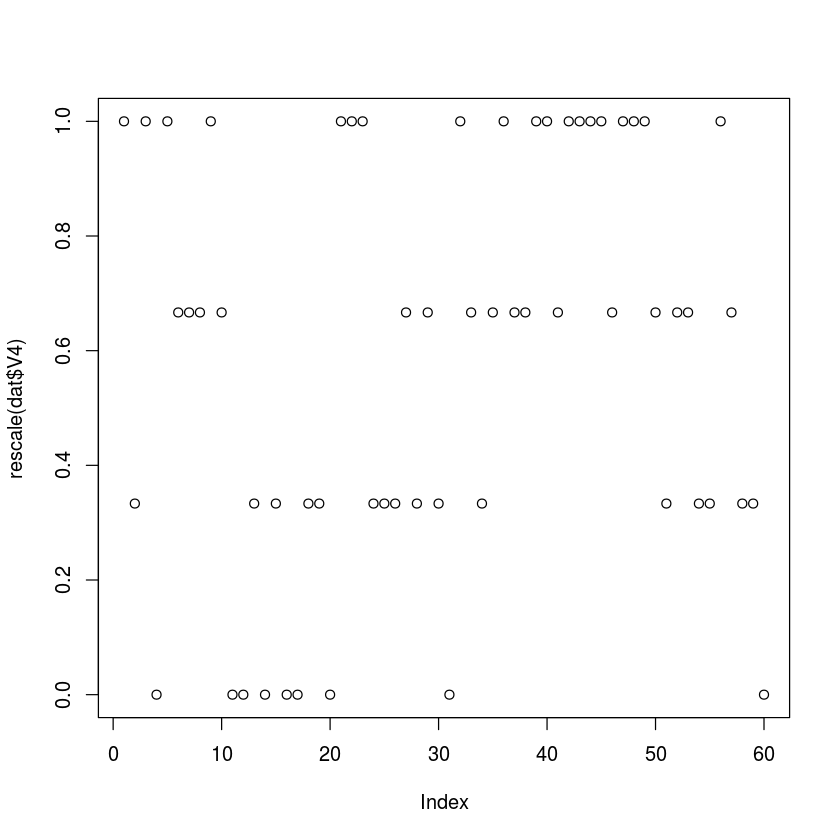

In [174]:
plot(rescale(dat$V4))

In [175]:
display <- function(a = 1, b = 2, c = 3) {
  result <- c(a, b, c)
  names(result) <- c("a", "b", "c")  # This names each element of the vector
  return(result)
}


In [176]:
display(c = 17)

a  b  c 
 1  2 17

In [177]:
display(a = 5, c= 13)

a  b  c 
 5  2 13

In [178]:
display(5, 13)

a  b  c 
 5 13  3

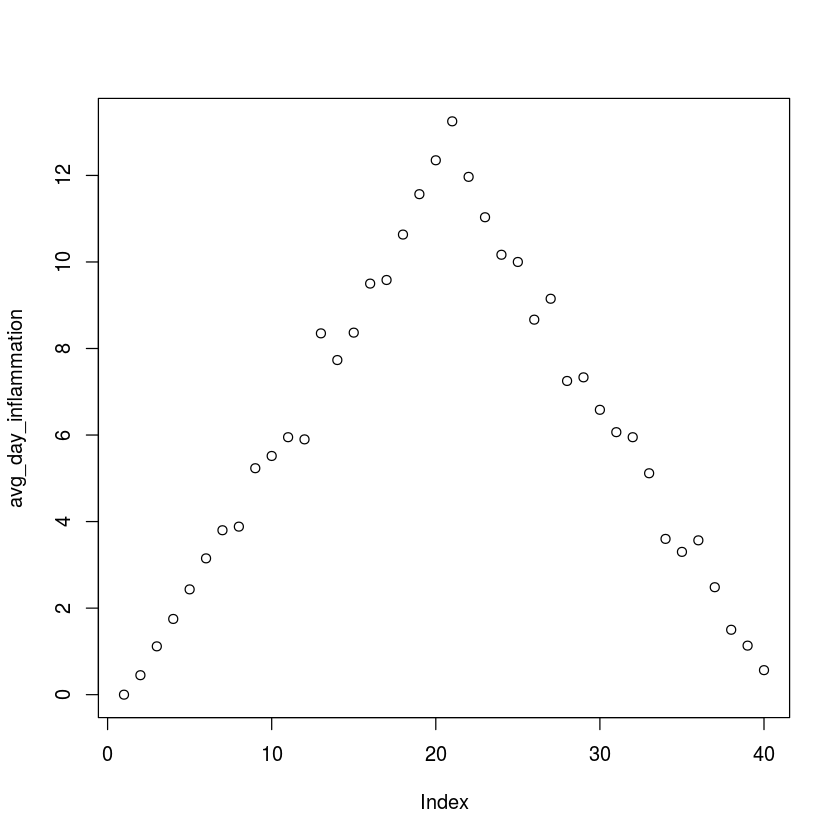

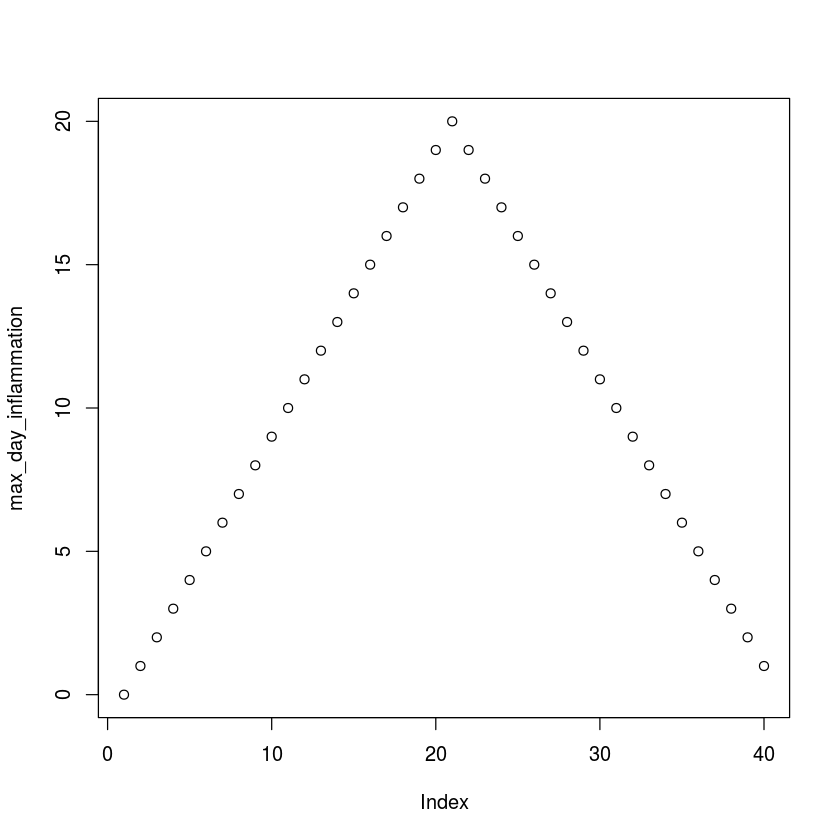

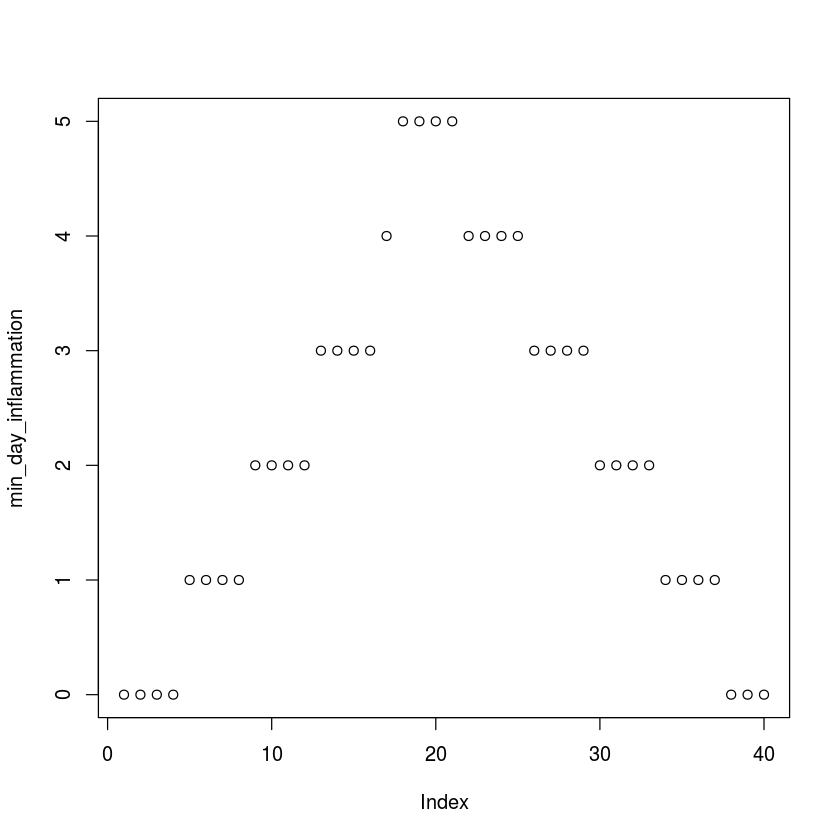

In [179]:
analyze <- function(filename) {
  # Plots the average, min, and max inflammation over time.
  # Input is character string of a csv file.
  dat <- read.csv(file = filename, header = FALSE)
  avg_day_inflammation <- apply(dat, 2, mean)
  plot(avg_day_inflammation)
  max_day_inflammation <- apply(dat, 2, max)
  plot(max_day_inflammation)
  min_day_inflammation <- apply(dat, 2, min)
  plot(min_day_inflammation)
}

analyze("data/inflammation-01.csv")

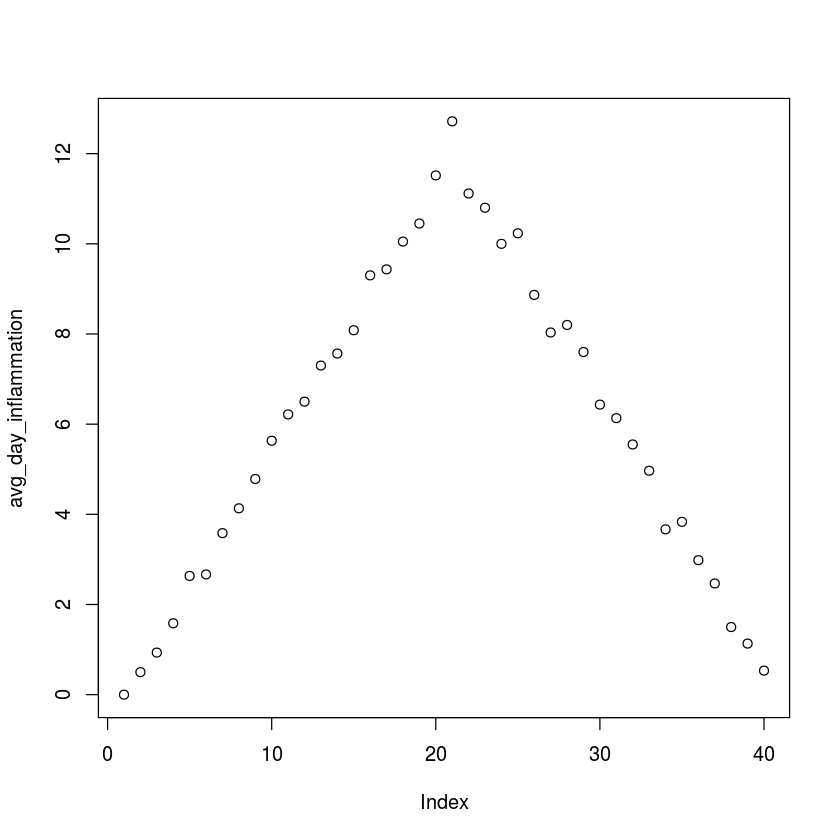

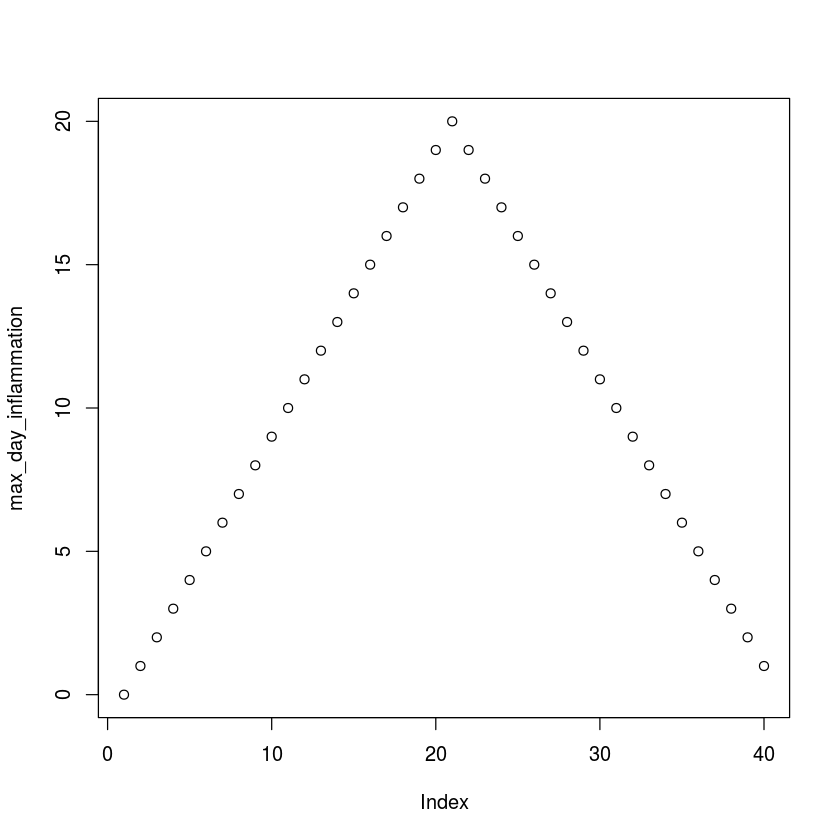

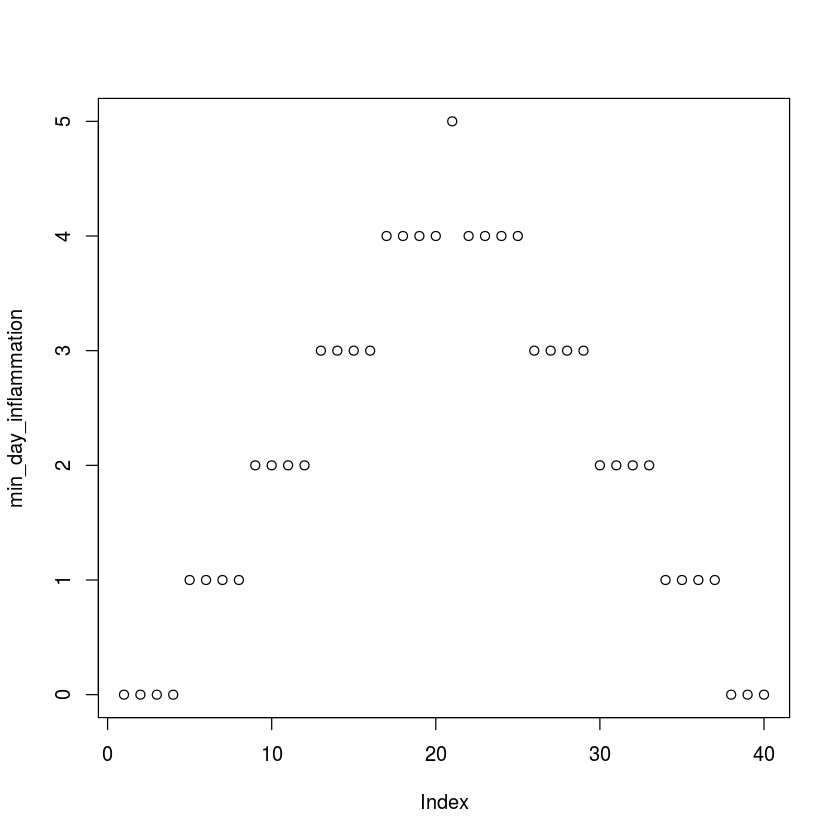

In [180]:
analyze("data/inflammation-02.csv")

#### looping

In [181]:
sentence = c("Let" , "the" , "computer" ,"do" ,"the" , "work")

In [185]:
print_words <- function(sentence){
    for(word in sentence)
        print(word)
}

In [186]:
print_words(sentence)

[1] "Let"
[1] "the"
[1] "computer"
[1] "do"
[1] "the"
[1] "work"


In [187]:
sum(seq(5))

[1] 15

In [188]:
2^4

[1] 16

### processing multiple files

 We do not need to write it ourselves because R already has a function to do this called list.files.

If we run the function without any arguments, list.files(), it returns every file in the current working directory. We can understand this result by reading the help file (?list.files). The first argument, path, is the path to the directory to be searched, and it has the default value of "." (recall from the lesson on the Unix Shell that "." is shorthand for the current working directory). The second argument, pattern, is the pattern being searched, and it has the default value of NULL. Since no pattern is specified to filter the files, all files are returned.



In [190]:
list.files(path = "data", pattern = "*.csv")

[1] "car-speeds-cleaned.csv" "car-speeds.csv"         "inflammation-01.csv"   
 [4] "inflammation-02.csv"    "inflammation-03.csv"    "inflammation-04.csv"   
 [7] "inflammation-05.csv"    "inflammation-06.csv"    "inflammation-07.csv"   
[10] "inflammation-08.csv"    "inflammation-09.csv"    "inflammation-10.csv"   
[13] "inflammation-11.csv"    "inflammation-12.csv"    "sample.csv"            
[16] "small-01.csv"           "small-02.csv"           "small-03.csv"

In [195]:
list.files(path = "data", pattern = "inflammation-\\d{2}.csv")

[1] "inflammation-01.csv" "inflammation-02.csv" "inflammation-03.csv"
 [4] "inflammation-04.csv" "inflammation-05.csv" "inflammation-06.csv"
 [7] "inflammation-07.csv" "inflammation-08.csv" "inflammation-09.csv"
[10] "inflammation-10.csv" "inflammation-11.csv" "inflammation-12.csv"

Finding the full names path ot the files

In [197]:
list.files(path = "data", pattern = "inflammation-\\d{2}.csv", full.names = TRUE)

[1] "data/inflammation-01.csv" "data/inflammation-02.csv"
 [3] "data/inflammation-03.csv" "data/inflammation-04.csv"
 [5] "data/inflammation-05.csv" "data/inflammation-06.csv"
 [7] "data/inflammation-07.csv" "data/inflammation-08.csv"
 [9] "data/inflammation-09.csv" "data/inflammation-10.csv"
[11] "data/inflammation-11.csv" "data/inflammation-12.csv"

[1] "data/inflammation-01.csv"


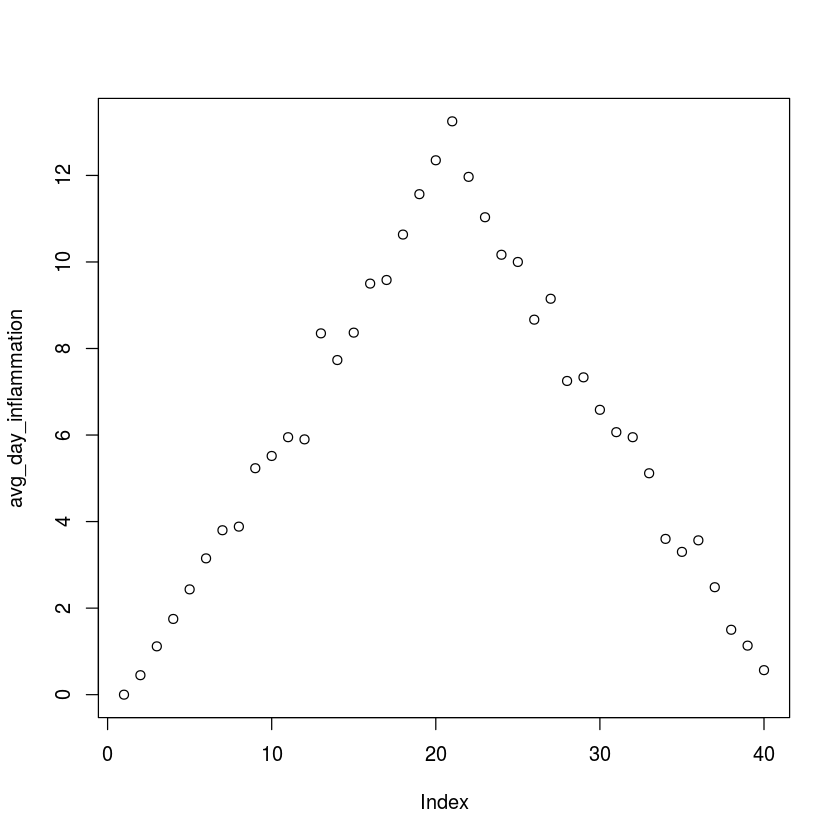

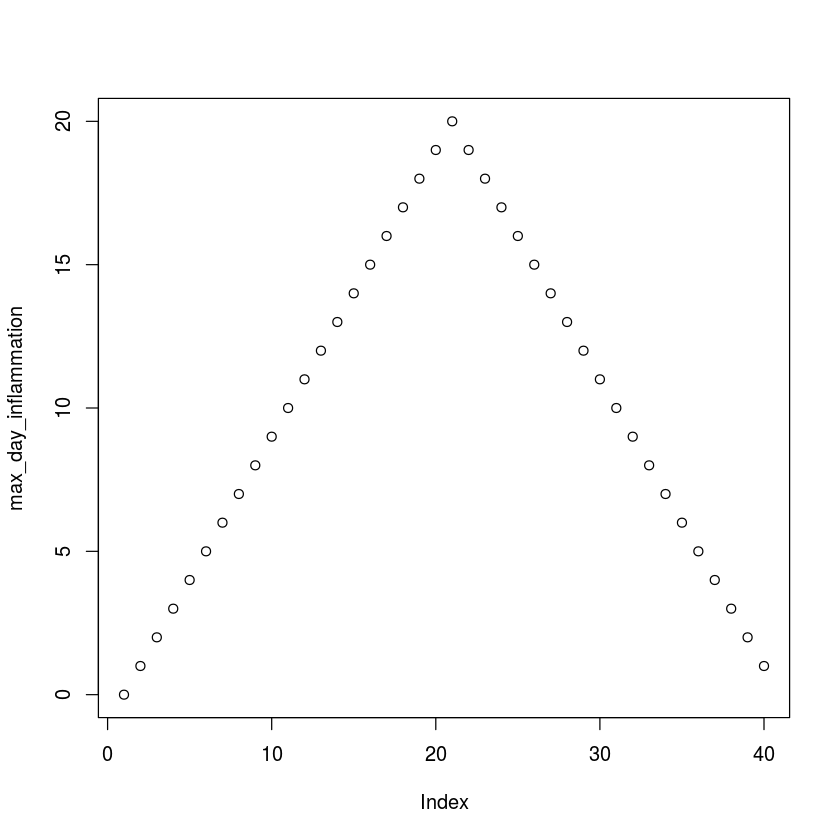

[1] "data/inflammation-02.csv"


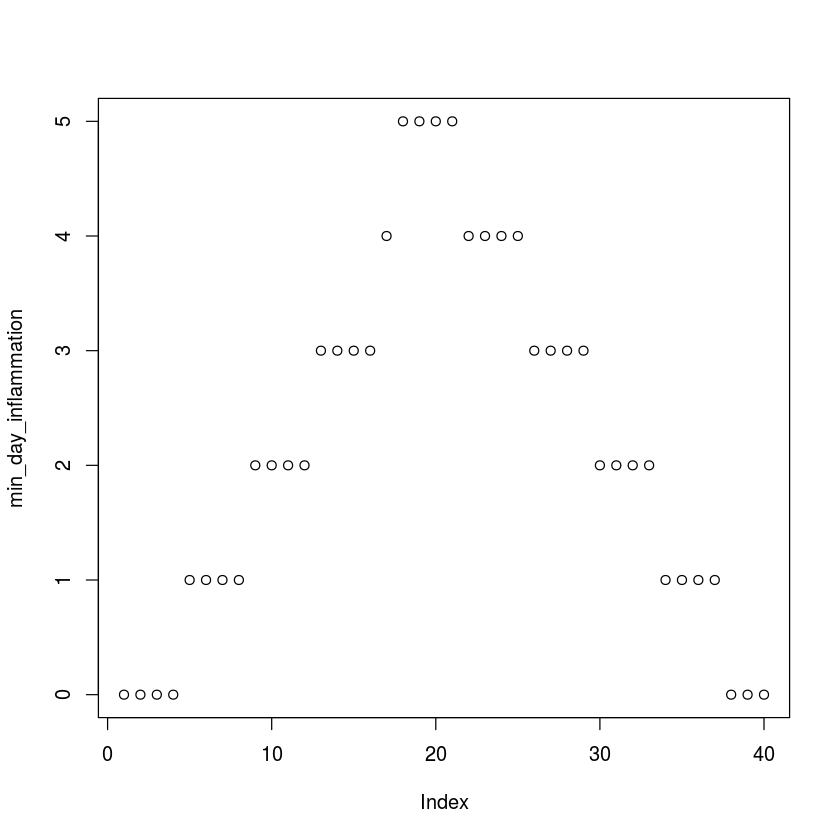

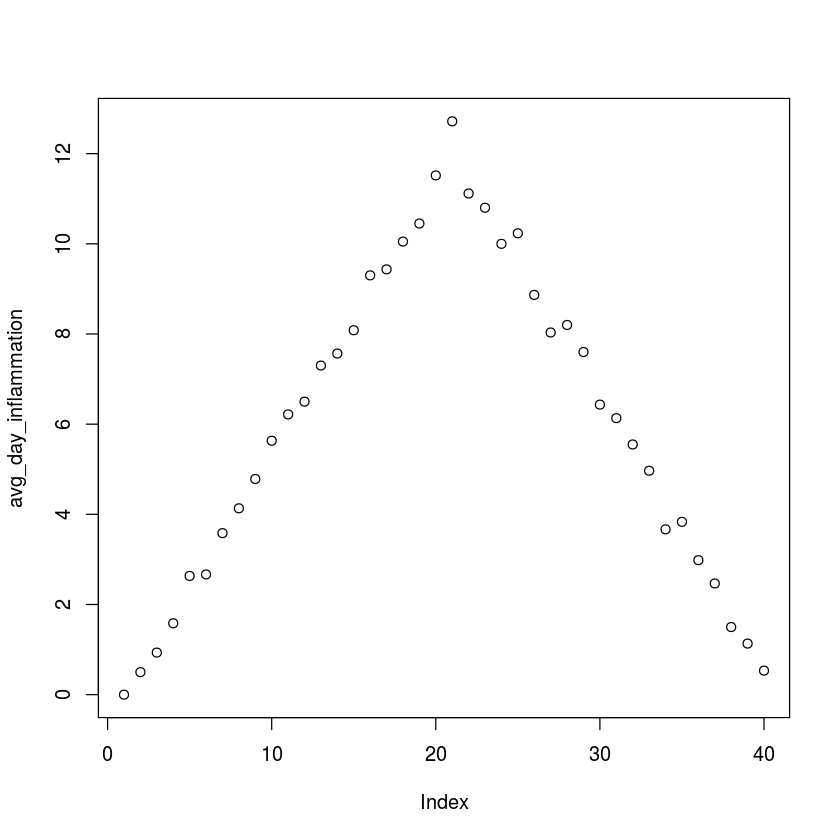

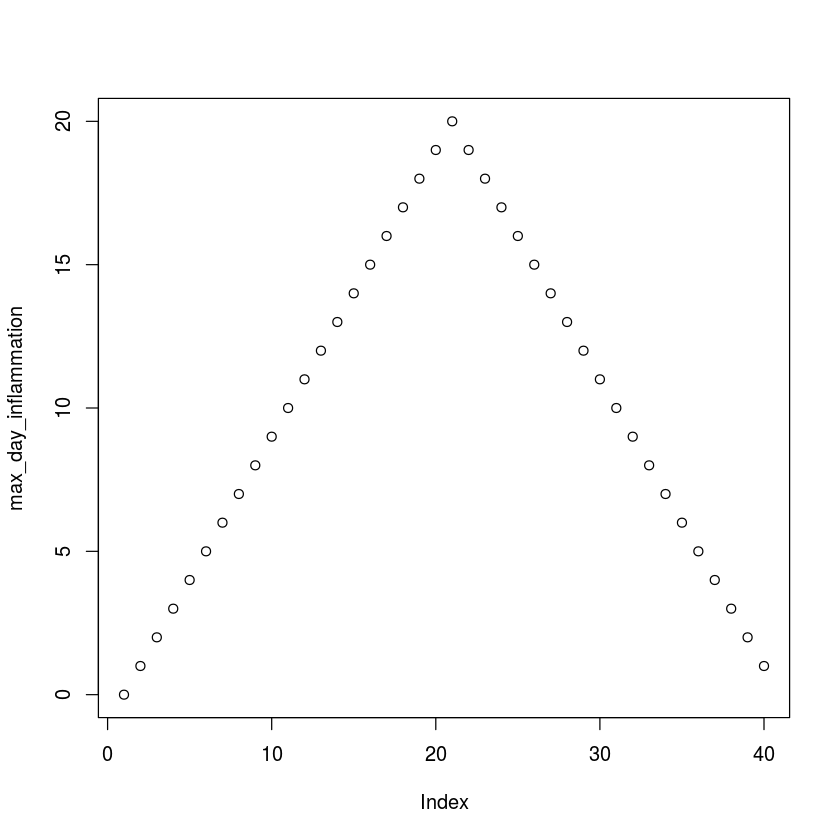

[1] "data/inflammation-03.csv"


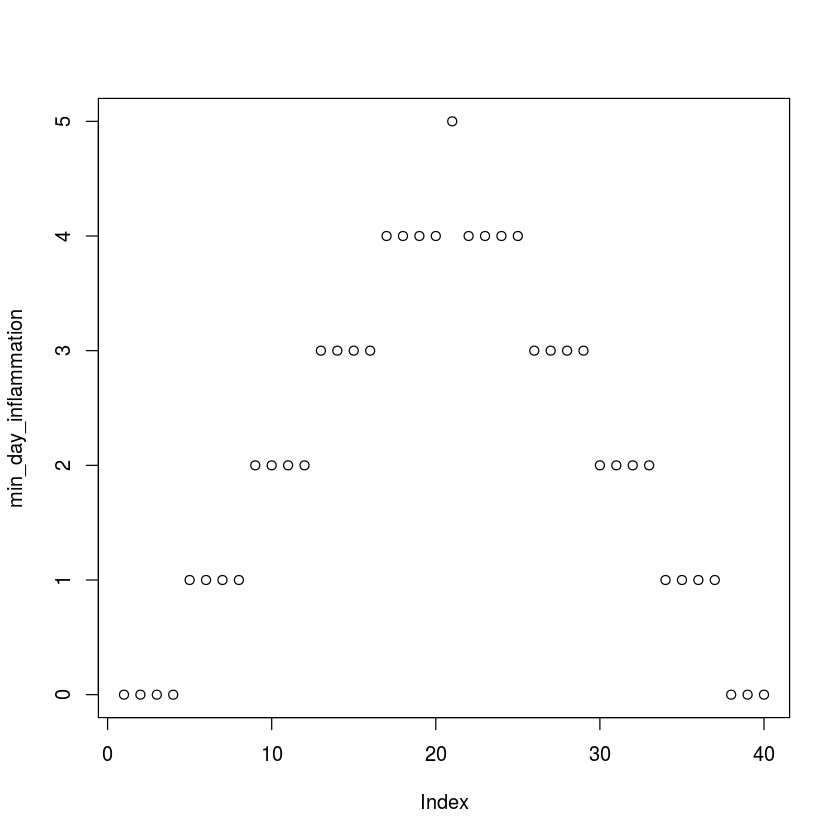

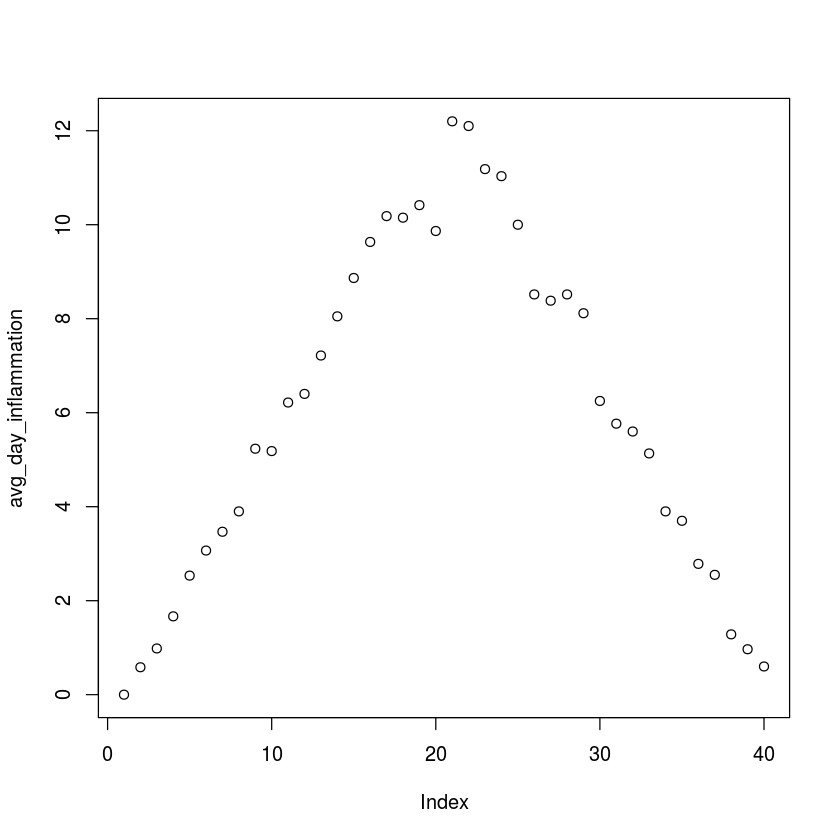

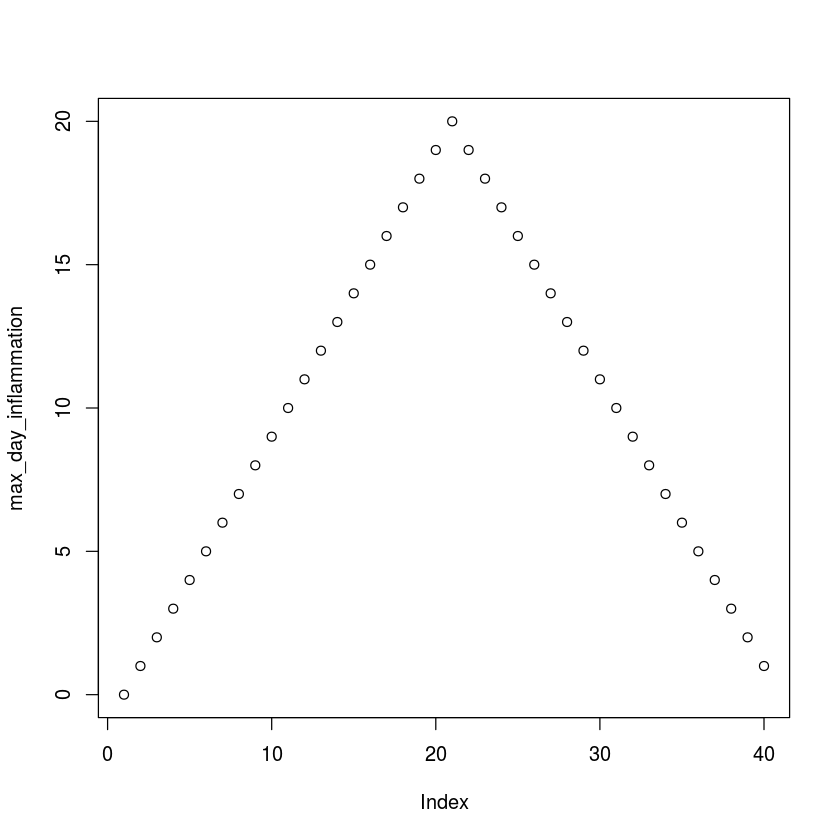

[1] "data/inflammation-04.csv"


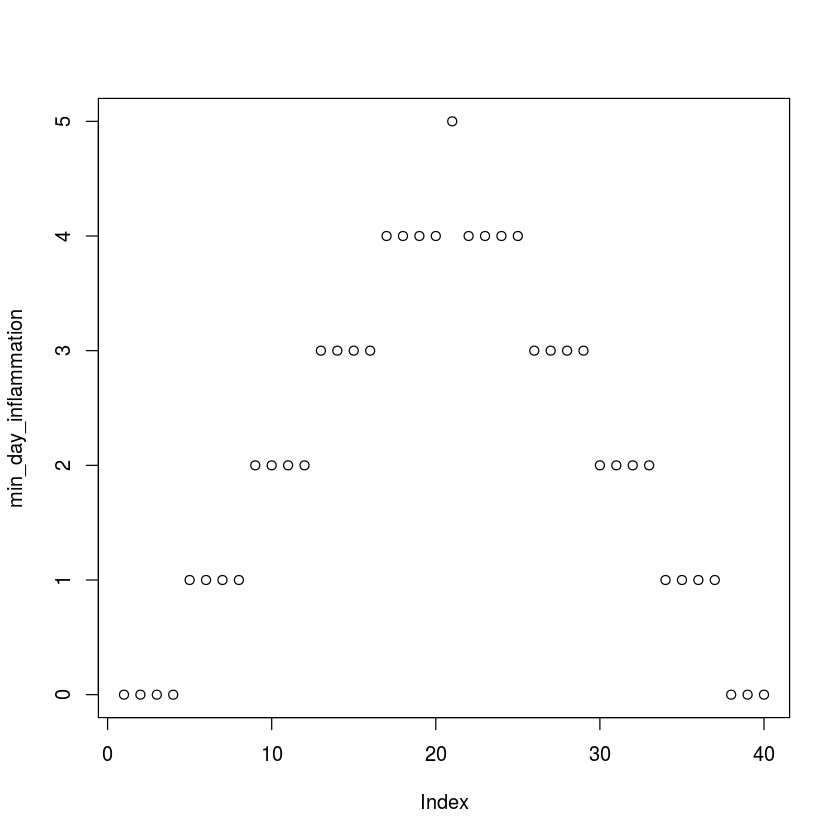

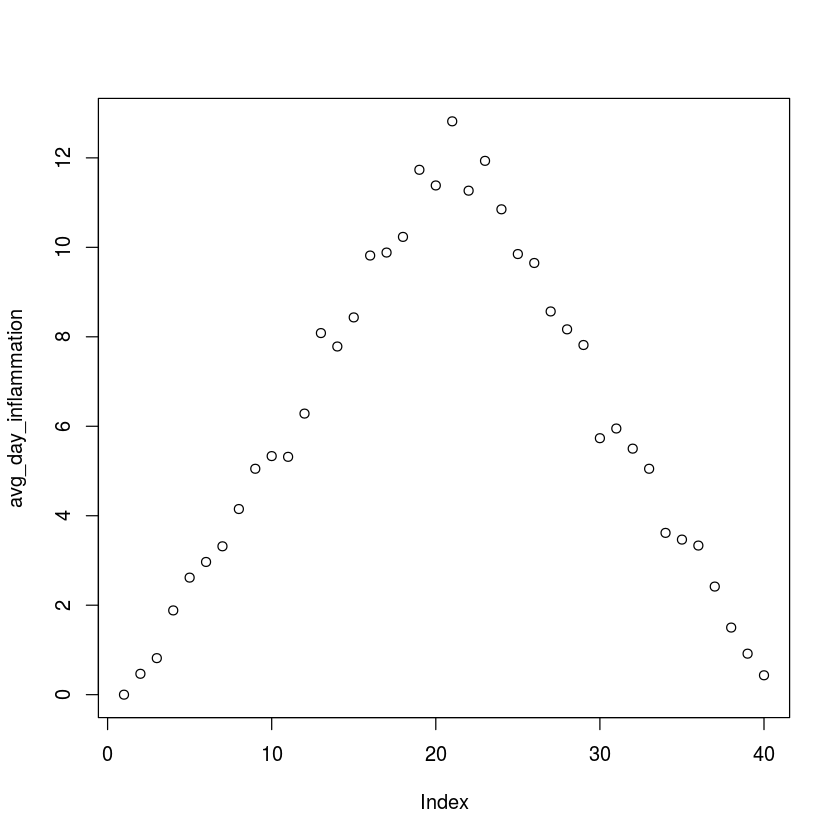

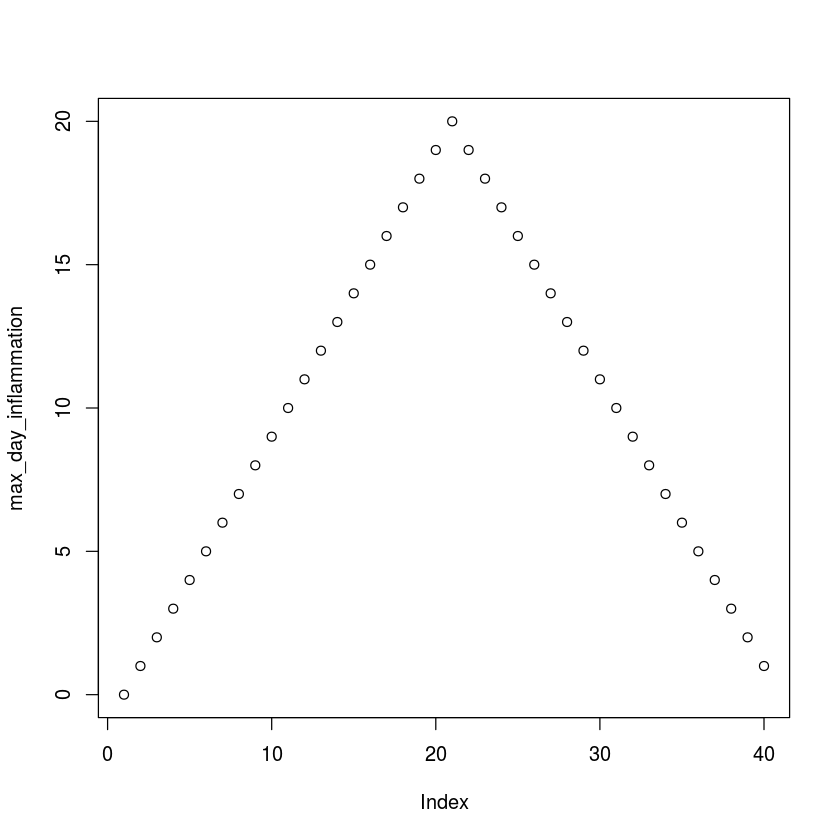

[1] "data/inflammation-05.csv"


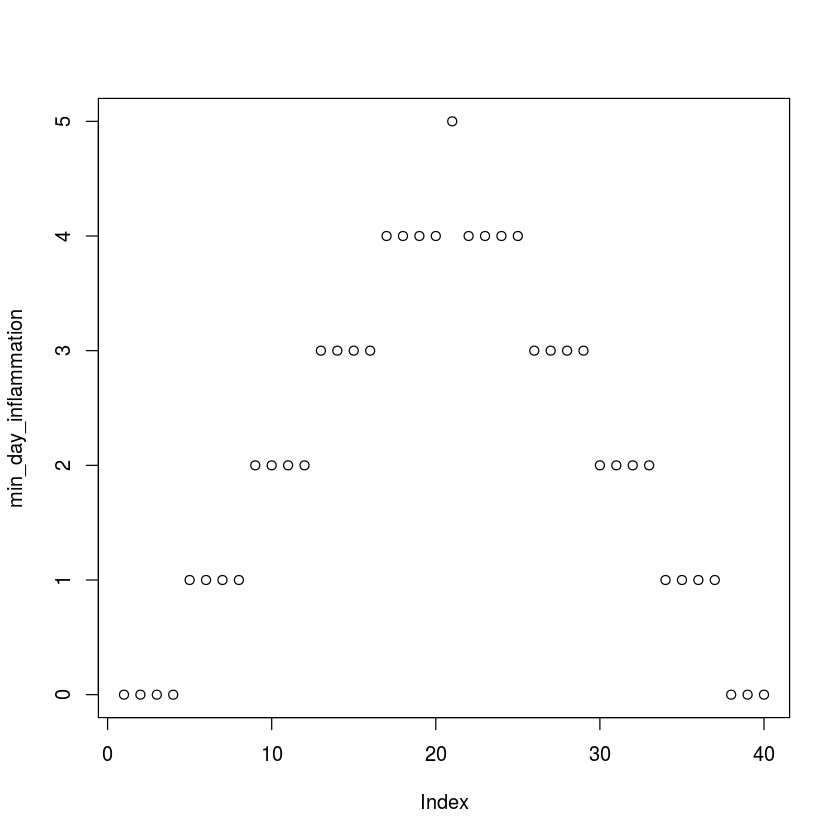

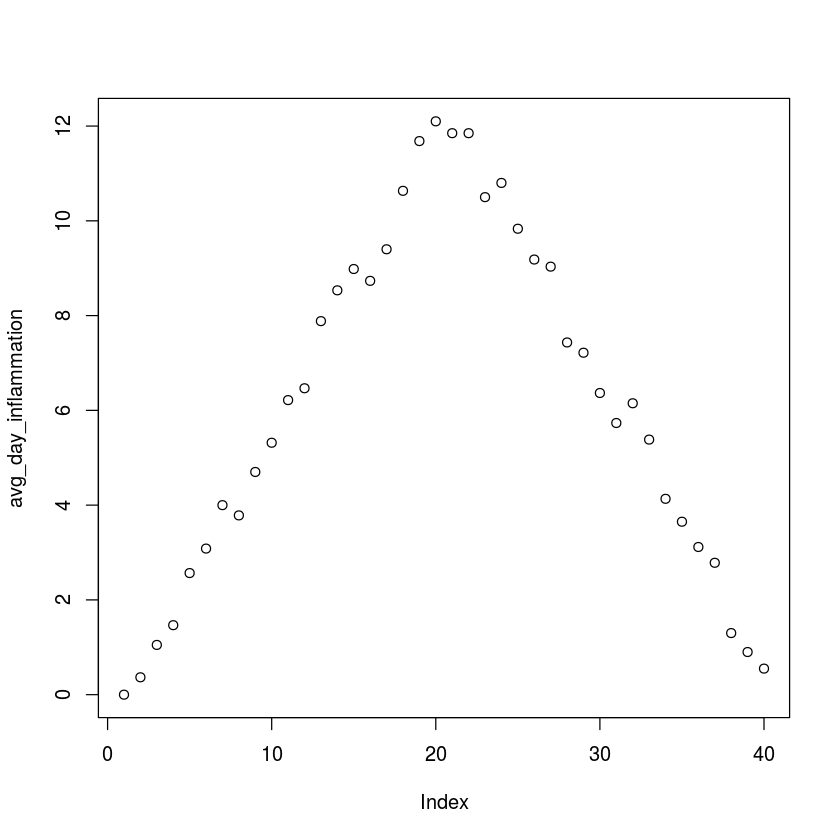

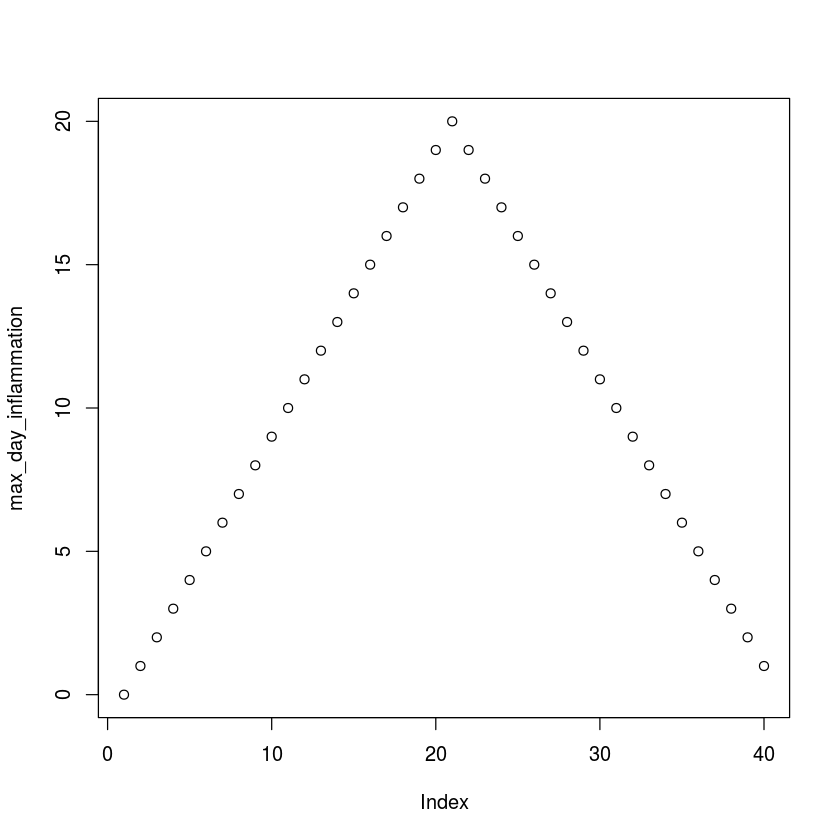

[1] "data/inflammation-06.csv"


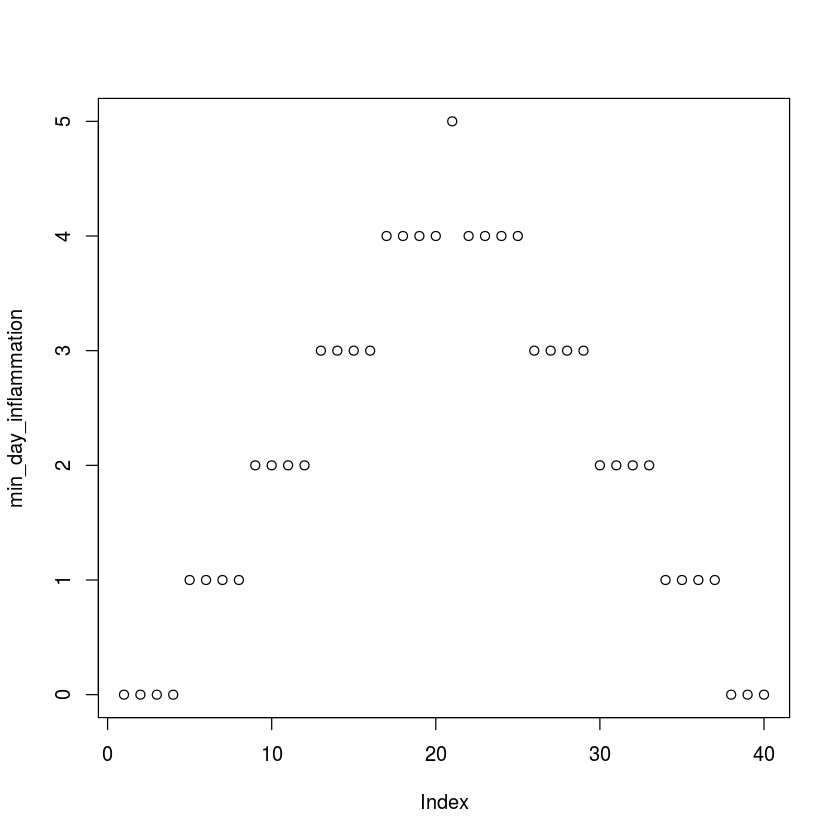

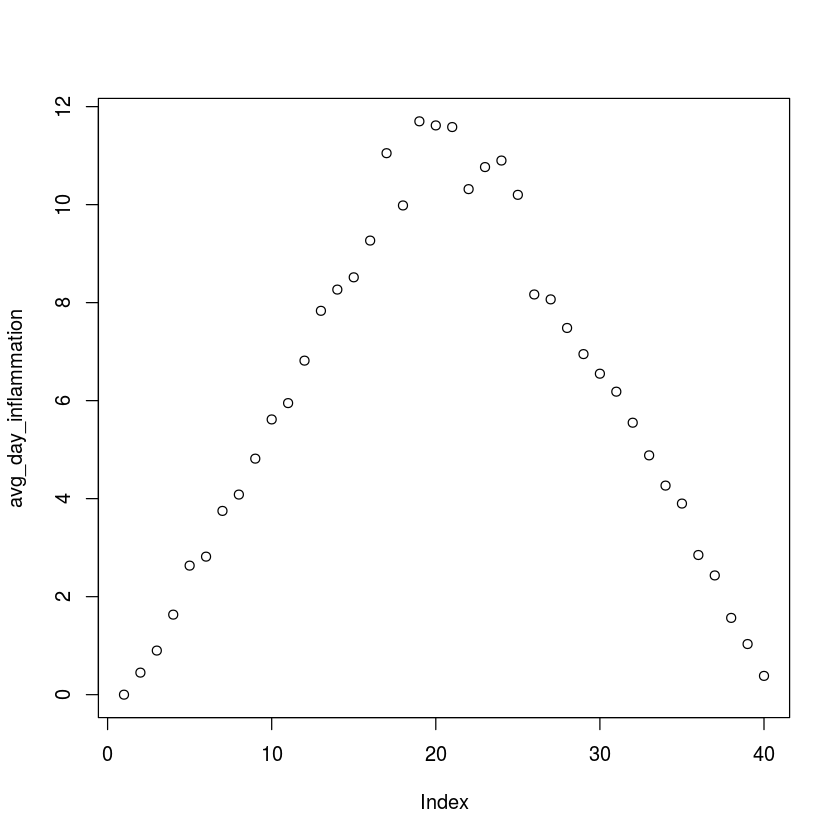

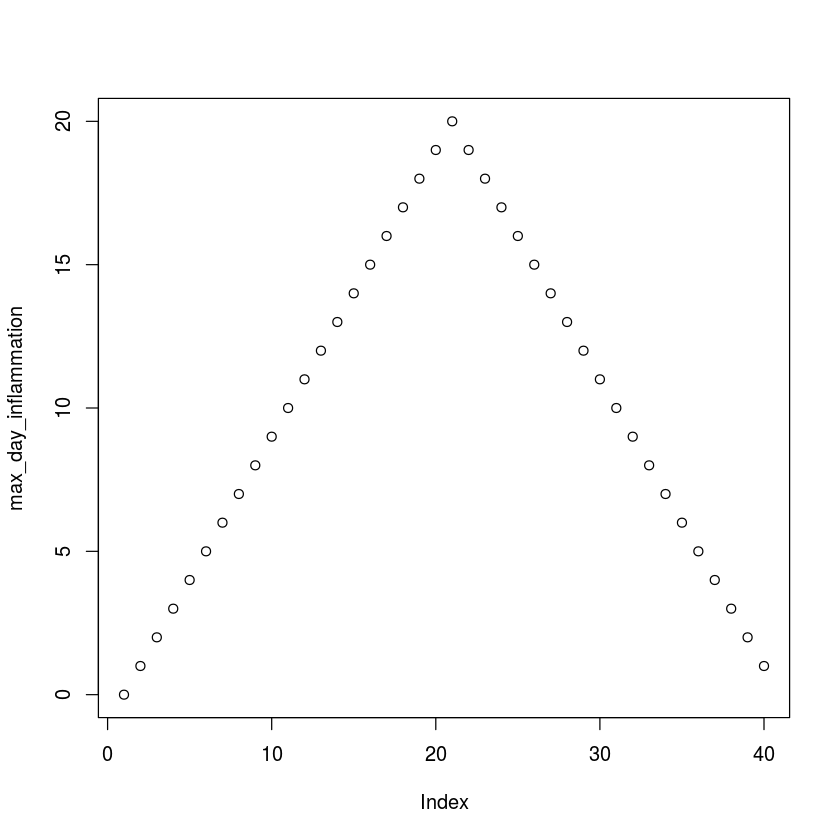

[1] "data/inflammation-07.csv"


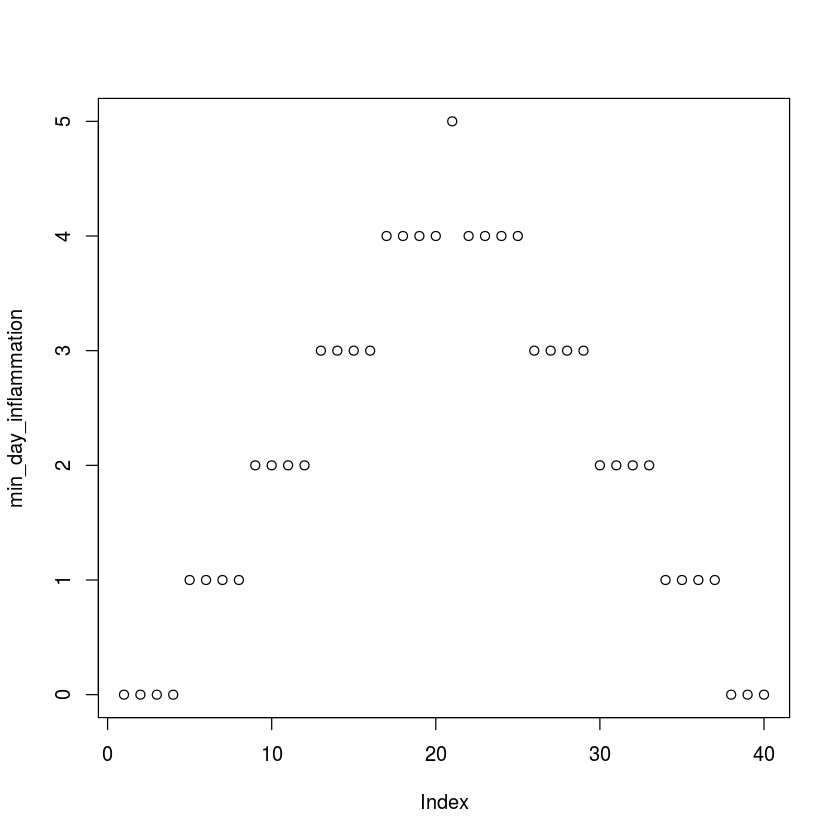

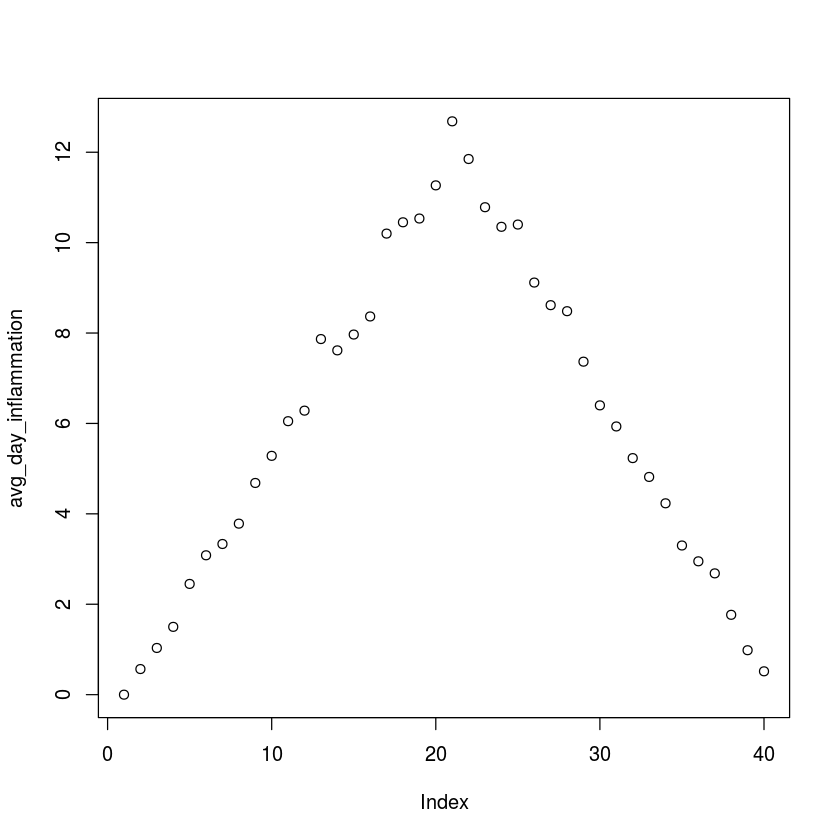

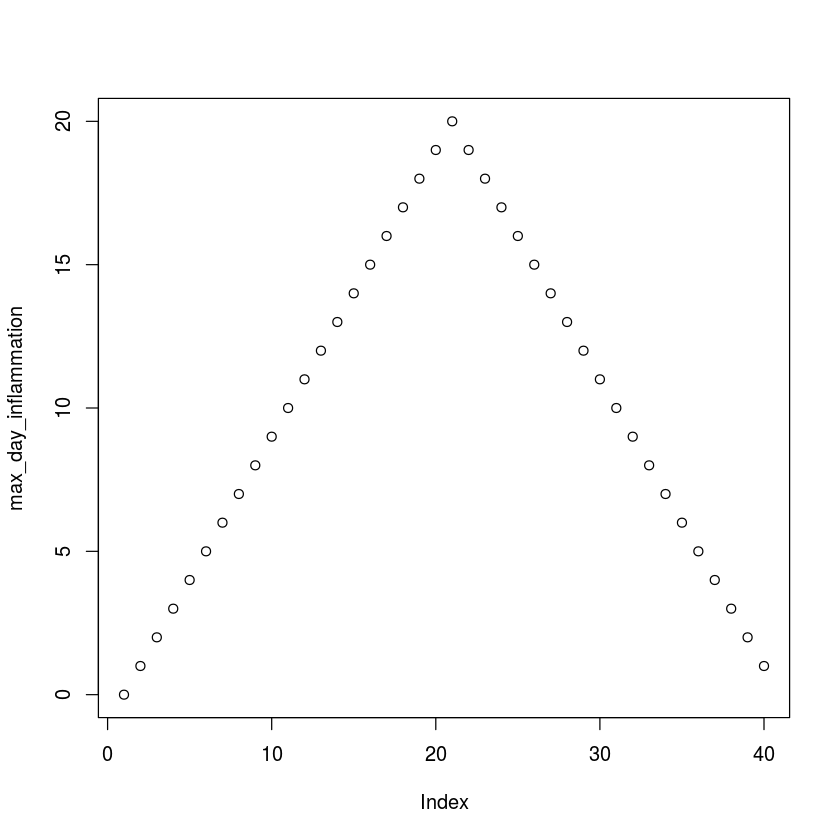

[1] "data/inflammation-08.csv"


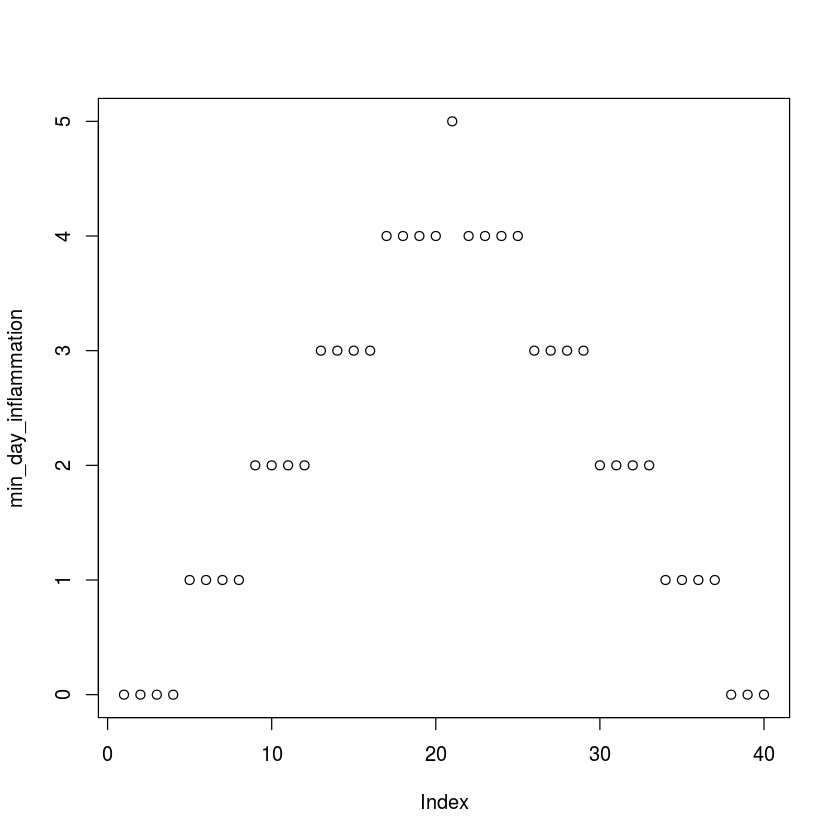

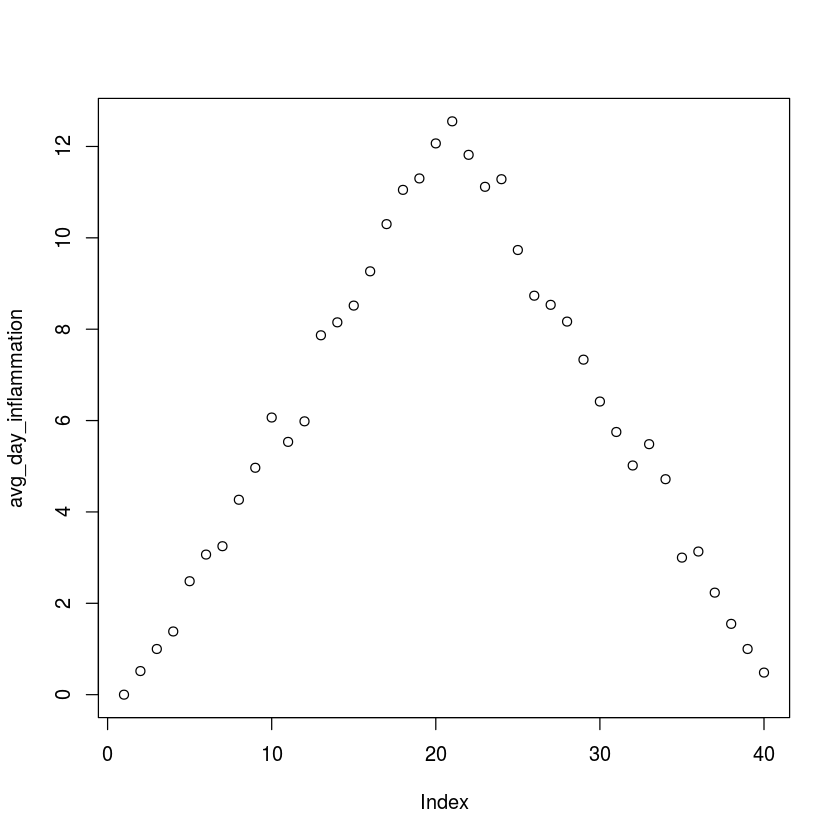

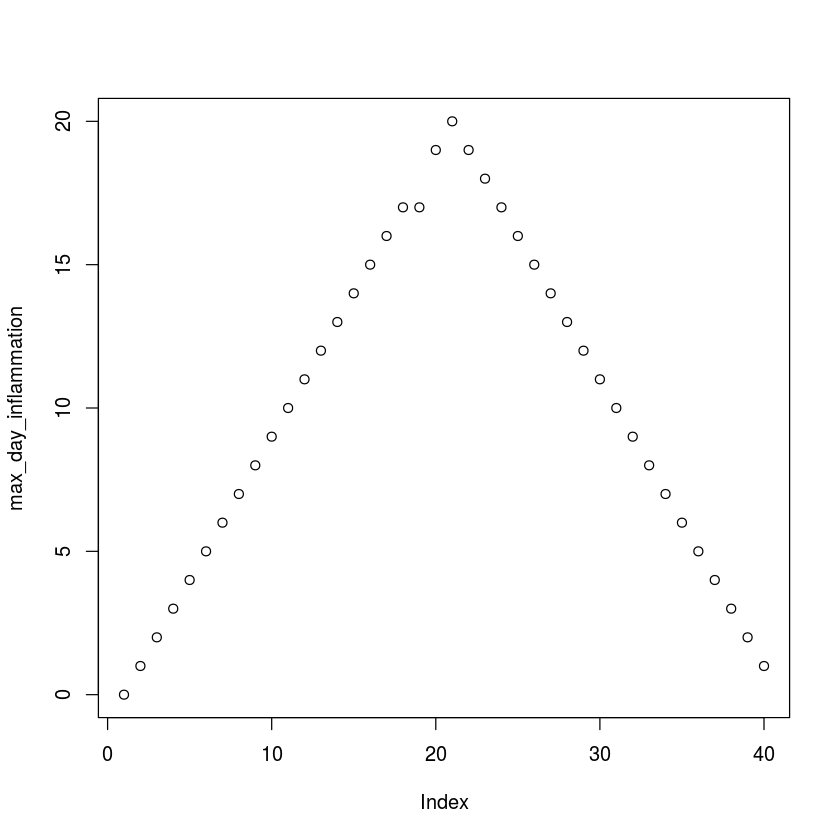

[1] "data/inflammation-09.csv"


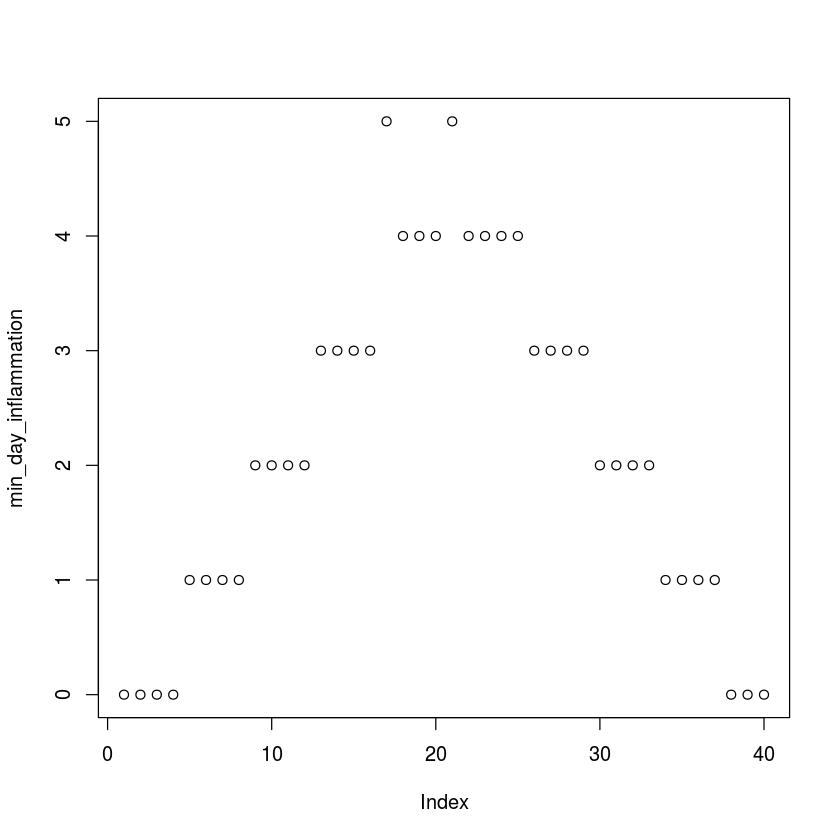

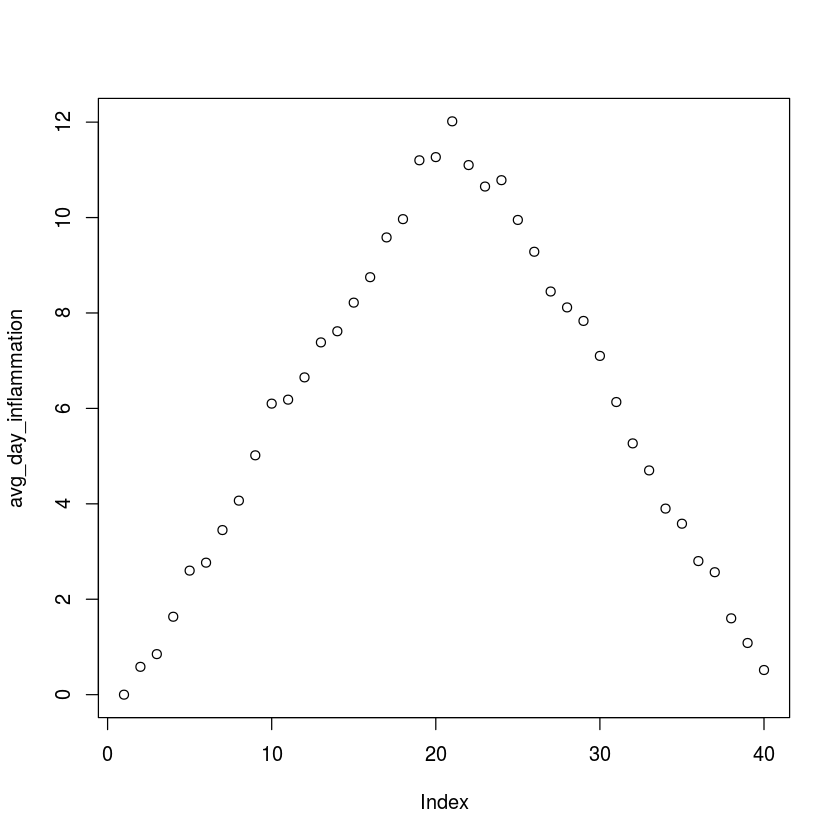

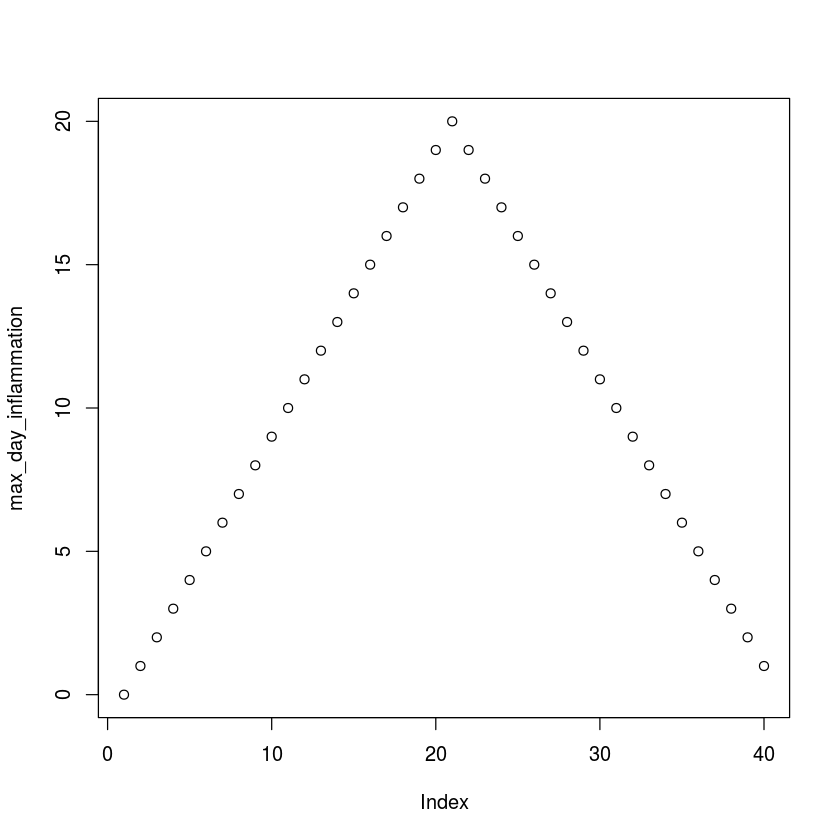

[1] "data/inflammation-10.csv"


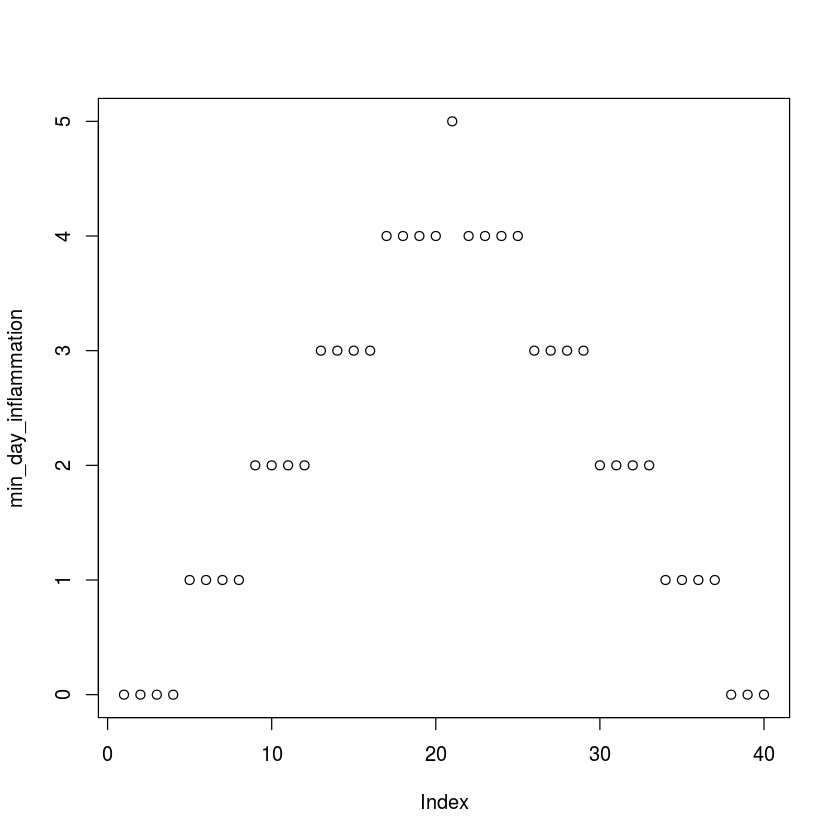

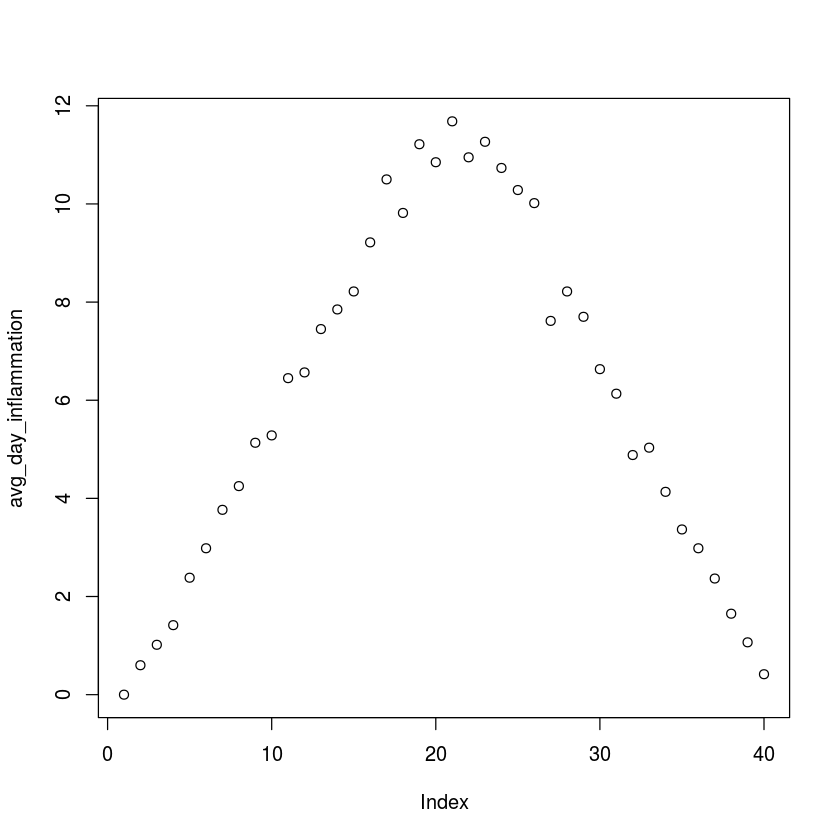

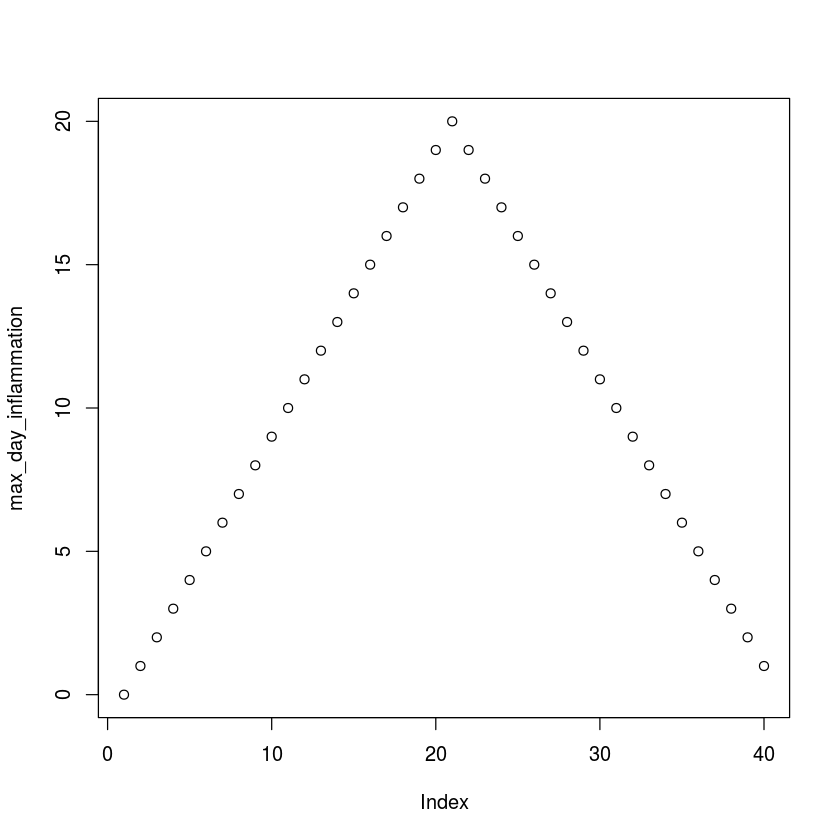

[1] "data/inflammation-11.csv"


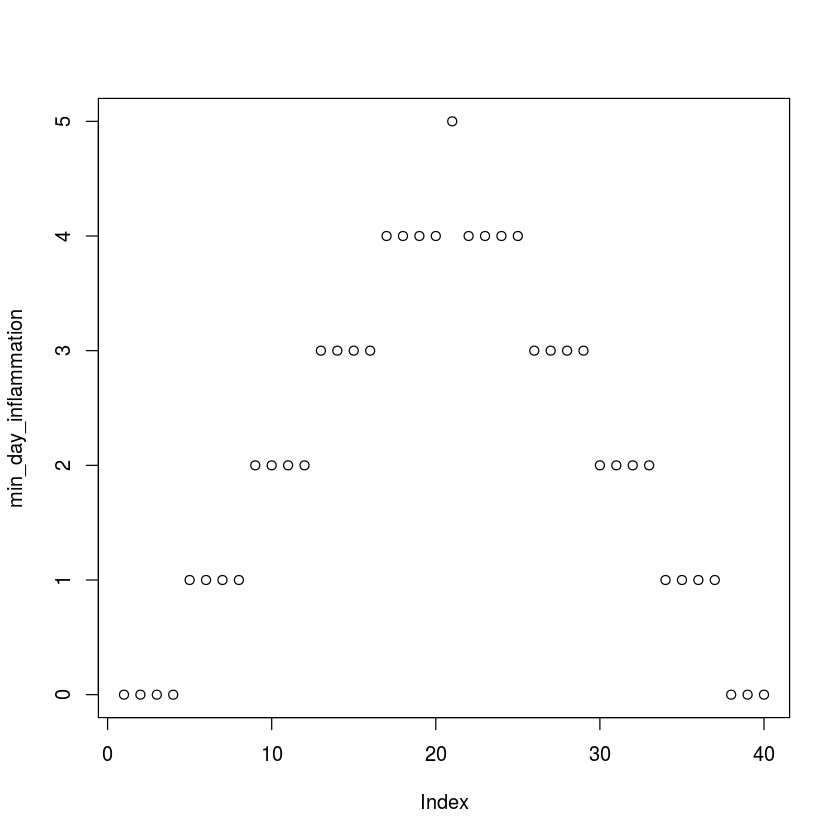

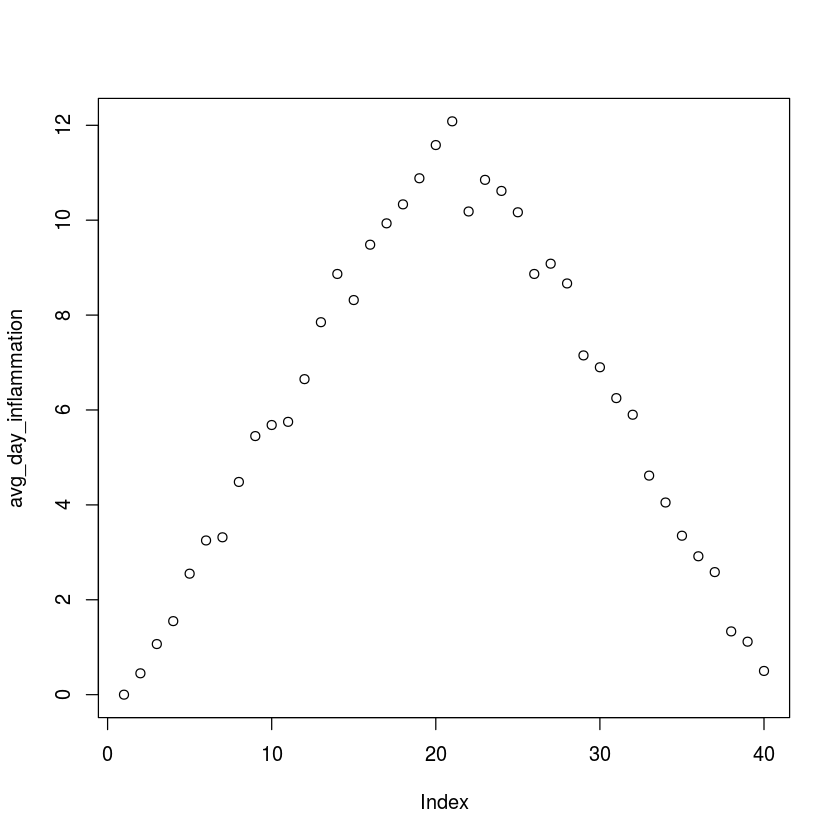

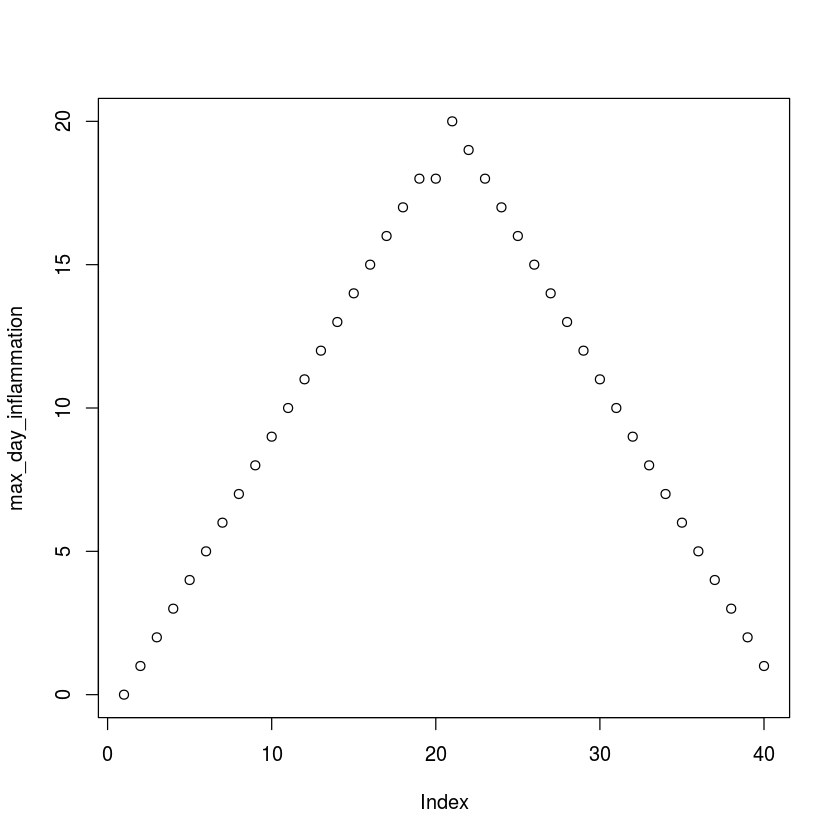

[1] "data/inflammation-12.csv"


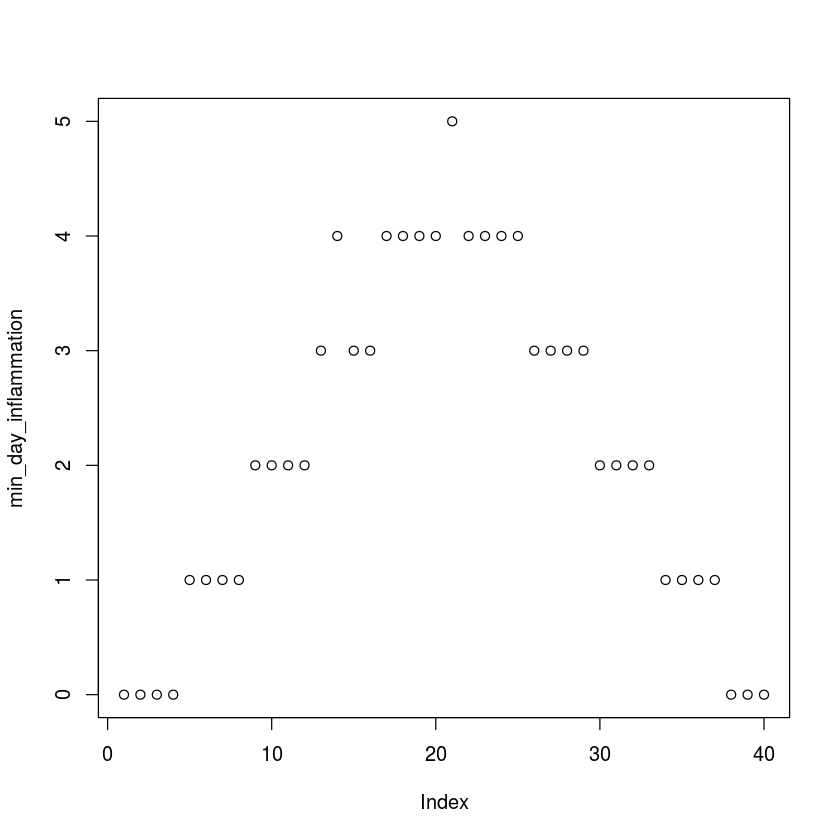

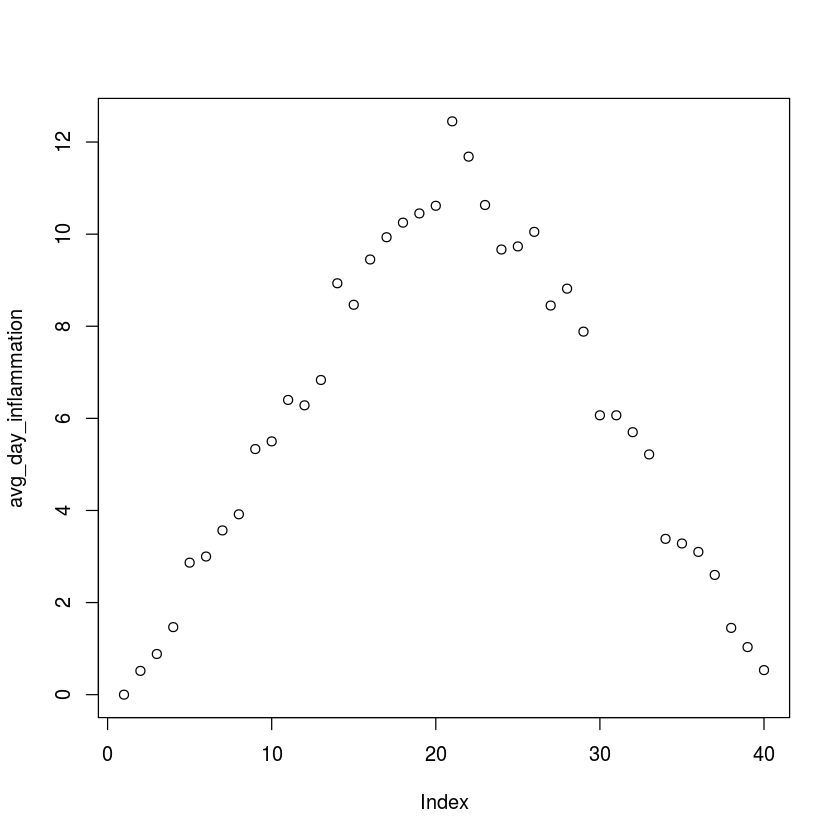

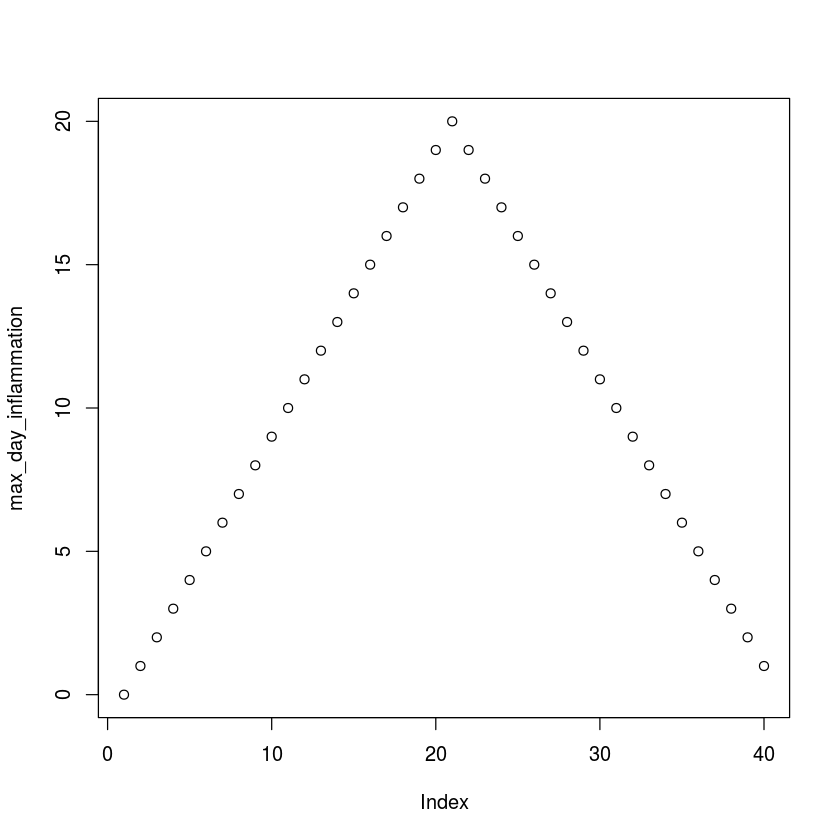

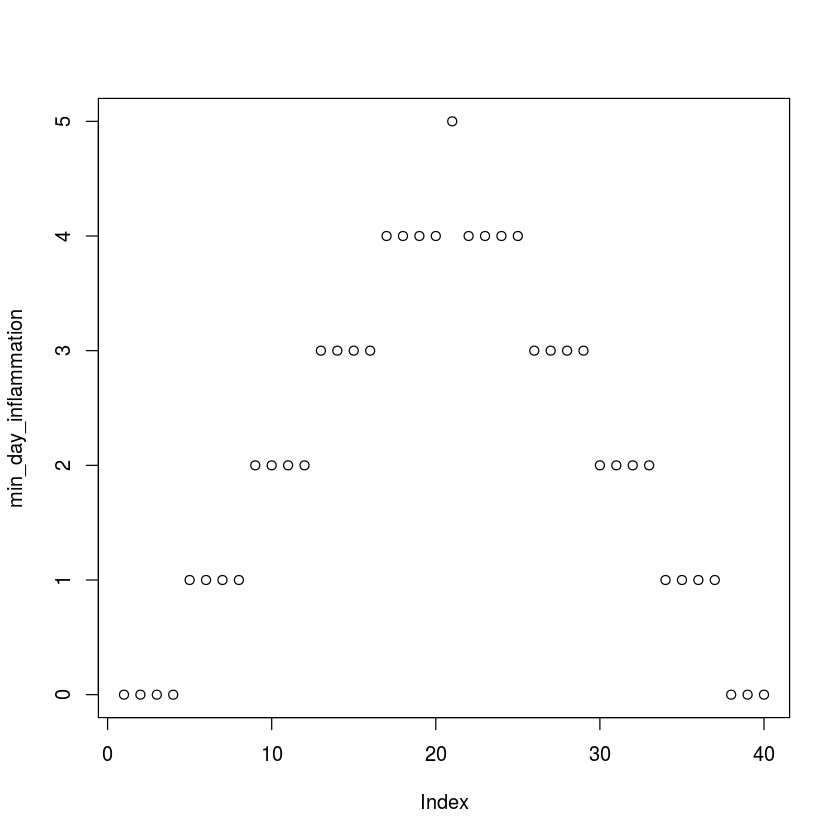

In [201]:
list_of_files <- list.files(path = "data", pattern = "inflammation-\\d{2}.csv", full.names = TRUE)
for(f in list_of_files){
    print(f)
    analyze(f)
}

#### Making choices

Here’s how we can save all three plots of the first inflammation data set in a pdf file:

The function pdf redirects all the plots generated by R into a pdf file, which in this case we have named “inflammation-01.pdf”. After we are done generating the plots to be saved in the pdf file, we stop R from redirecting plots with the function dev.off.

In [202]:
pdf("inflammation-01.pdf")
analyze("data/inflammation-01.csv")
dev.off()

png 
  2

In [203]:
num <- 37
if (num > 100) {
  print("greater")
} else {
  print("not greater")
}
print("done")

[1] "not greater"
[1] "done"


We can also combine tests. An ampersand, &, symbolizes “and”. A vertical bar, |, symbolizes “or”. & is only true if both parts are true:

In [204]:
if (1 > 0 & -1 > 0) {
    print("both parts are true")
} else {
  print("at least one part is not true")
}

[1] "at least one part is not true"


Write a function plot_dist that plots a boxplot if the length of the vector is greater than a specified threshold and a stripchart otherwise. To do this you’ll use the R functions boxplot and stripchart.

In [206]:
length(dat[,10])

[1] 60

In [210]:
plot_dist <- function(data , threshold){
    if(length(data) >  threshold)
        boxplot(data)
    else
        stripchart(data)
}

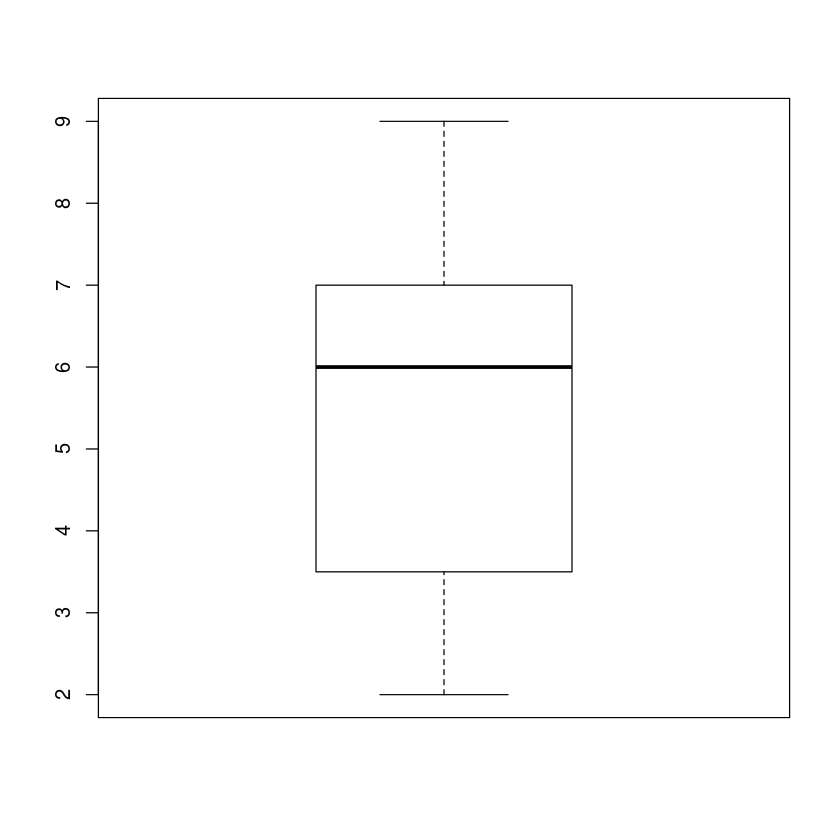

In [211]:
plot_dist(dat[,10], threshold = 10)

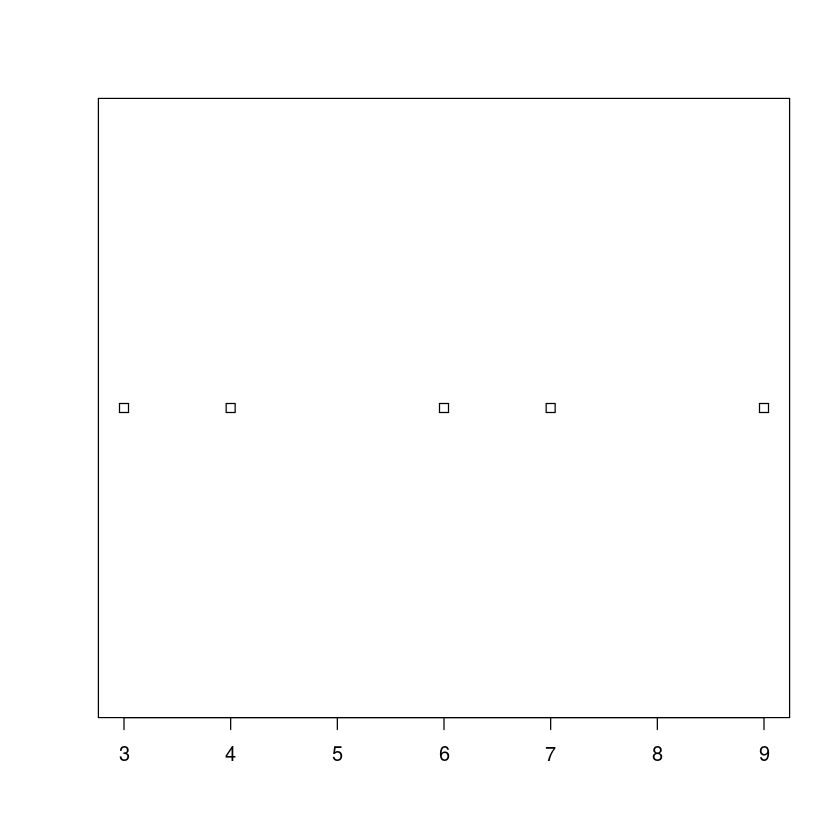

In [212]:
plot_dist(dat[1:5, 10], threshold = 10)  # samples (rows) 1-5 on day (column) 10

In [213]:
plot_dist <- function(data , threshold , use_boxplot = TRUE){
    if(length(data) >  threshold){
        if(use_boxplot)
            boxplot(data)
        else
            hist(data)
    }
    else
        stripchart(data)
}

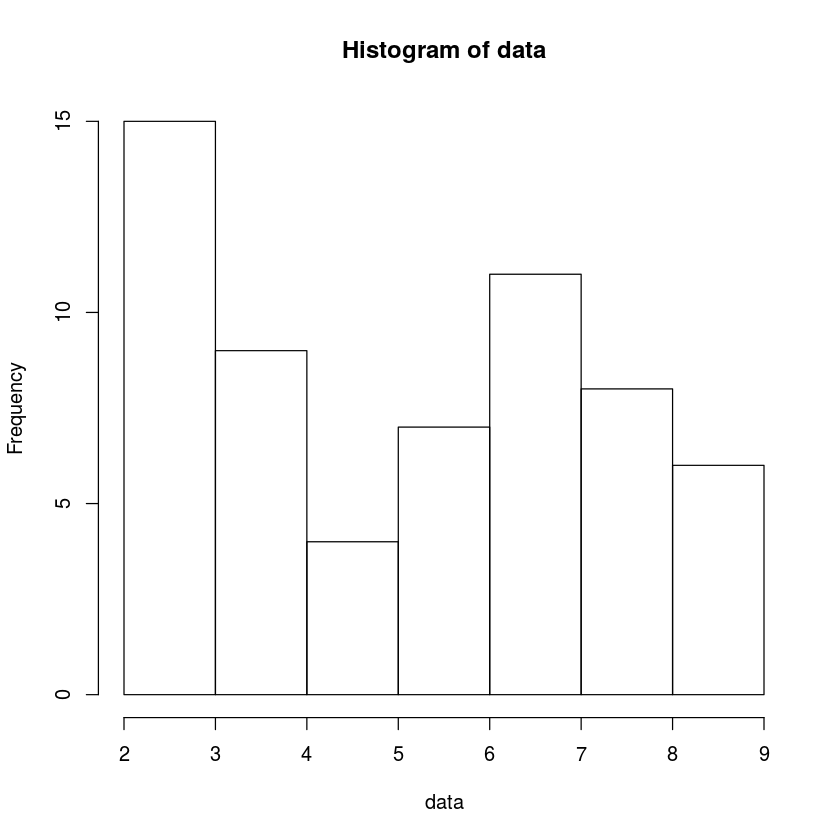

In [214]:
plot_dist(dat[,10], threshold = 10 , use_boxplot = FALSE)

In [215]:
list_of_files

[1] "data/inflammation-01.csv" "data/inflammation-02.csv"
 [3] "data/inflammation-03.csv" "data/inflammation-04.csv"
 [5] "data/inflammation-05.csv" "data/inflammation-06.csv"
 [7] "data/inflammation-07.csv" "data/inflammation-08.csv"
 [9] "data/inflammation-09.csv" "data/inflammation-10.csv"
[11] "data/inflammation-11.csv" "data/inflammation-12.csv"

In [217]:
filename_max <- ""
filename_max_avg_inflmtion_val <- 0
    
for(file in list_of_files){
    dat <- read.csv(file , header = FALSE)
    curr_max <- max(apply(dat, 1 ,mean))
    if(filename_max_avg_inflmtion_val < curr_max ){
        filename_max <- file
        filename_max_avg_inflmtion_val <- curr_max 
    }
}

print(filename_max)
print(filename_max_avg_inflmtion_val)


[1] "data/inflammation-10.csv"
[1] 7.425


Now that we know how to have R make decisions based on input values, let’s update analyze:

In [218]:
analyze <- function(filename, output = NULL) {
  # Plots the average, min, and max inflammation over time.
  # Input:
  #    filename: character string of a csv file
  #    output: character string of pdf file for saving
  if (!is.null(output)) {
    pdf(output)
  }
  dat <- read.csv(file = filename, header = FALSE)
  avg_day_inflammation <- apply(dat, 2, mean)
  plot(avg_day_inflammation)
  max_day_inflammation <- apply(dat, 2, max)
  plot(max_day_inflammation)
  min_day_inflammation <- apply(dat, 2, min)
  plot(min_day_inflammation)
  if (!is.null(output)) {
    dev.off()
  }
}

In [219]:
analyze("data/inflammation-02.csv", output = "inflammation-02.pdf")

png 
  2

In [220]:
dir.create("results")

In [221]:
analyze("data/inflammation-03.csv", output = "results/inflammation-03.pdf")

png 
  2

In [223]:
? plot

type argument defines what kind ofplot u want

type
what type of plot should be drawn. Possible types are
"p" for points,
"l" for lines,
"b" for both,
"c" for the lines part alone of "b",
"o" for both ‘overplotted’,
"h" for ‘histogram’ like (or ‘high-density’) vertical lines,
"s" for stair steps,
"S" for other steps, see ‘Details’ below,
"n" for no plotting.

In [224]:
sessionInfo()

R version 3.2.3 (2015-12-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.1 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_IN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_IN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_IN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_IN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] magrittr_1.5         IRdisplay_0.5.0      pbdZMQ_0.3-3        
 [4] tools_3.2.3          htmltools_0.3.6      base64enc_0.1-3     
 [7] crayon_1.3.4         Rcpp_0.12.17         uuid_0.1-2          
[10] stringi_1.2.2        IRkernel_0.8.12.9000 jsonlite_1.5        
[13] stringr_1.3.1        digest_0.6.15        repr_0.15.0         
[16] evaluate_0.10.1     

The function commandArgs extracts all the command line arguments and returns them as a vector.

In [226]:
?commandArgs

The function commandArgs extracts all the command line arguments and returns them as a vector. The function cat, similar to the cat of the Unix Shell, outputs the contents of the variable. Since we did not specify a filename for writing, cat sends the output to standard output, which we can then pipe to other Unix functions. Because we set the argument sep to "\n", which is the symbol to start a new line, each element of the vector is printed on its own line. See program print-args-trailing.R

### parsing command line flags

R has a package named argparse that helps handle complex command-line flags (it utilizes a Python module of the same name).

Loading all of the packages that will be necessary to run your code (using library) is a nice way of indicating which packages are necessary to run your code. 

library(ggplot2)

library(reshape)

library(vegan)

It’s easy to annotate and mark your code using # or #- to set off sections of your code and to make finding specific parts of your code easier. For example, it’s often helpful when writing code to separate the function definitions. If you create only one or a few custom functions in your script, put them toward the top of your code. If you have written many functions, put them all in their own .R file and then source those files. source will define all of these functions so that your code can make use of them as needed.

source("my_genius_fxns.R")

Use a consistent style within your code. For example, name all matrices something ending in _mat. Consistency makes code easier to read and problems easier to spot.

Keep your code in bite-sized chunks. If a single function or loop gets too long, consider looking for ways to break it into smaller pieces.

Don’t repeat yourself–automate! If you are repeating the same code over and over, use a loop or a function to repeat that code for you. Needless repetition doesn’t just waste time–it also increases the likelihood you’ll make a costly mistake!

Keep all of your source files for a project in the same directory, then use relative paths as necessary to access them. For example, use

dat <- read.csv(file = "files/dataset-2013-01.csv", header = TRUE)
rather than:

dat <- read.csv(file = "/Users/Karthik/Documents/sannic-project/files/dataset-2013-01.csv", header = TRUE)

### Making packages in R

An R package is the basic unit of reusable code. If you want to reuse code later or want others to be able to use your code, you should put it in a package.

An R package requires four components:

a DESCRIPTION file with metadata about the package
an R directory with the code
a man directory with documentation (we will create this automatically)
a NAMESPACE file listing user-level functions in the package (we will also create this automatically)


#### Description Files
An R package is the basic unit of reusable code. If you want to reuse code later or want others to be able to use your code, you should put it in a package.

An R package requires four components:

a DESCRIPTION file with metadata about the package
an R directory with the code
a man directory with documentation (we will create this automatically)
a NAMESPACE file listing user-level functions in the package (we will also create this automatically)


#### .R files
Functions don’t all have to be in one file or each in separate files. How you organize them is up to you. Suggestion: organize in a logical manner so that you know which file holds which functions.

We will use the devtools and roxygen2 packages, which make creating packages in R relatively simple. Both can be installed from CRAN like this:

In [227]:
install.packages(c("devtools", "roxygen2"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message in install.packages(c("devtools", "roxygen2")):
“'lib = "/usr/local/lib/R/site-library"' is not writable”

ERROR: Error in install.packages(c("devtools", "roxygen2")): unable to install packages


#### Addressing Data

R is a powerful language for data manipulation. There are three main ways for addressing data inside R objects.

By index (slicing)

By logical vector

By name (columns only)

In [228]:
dat

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,0,2,3,3,1,6,6,3,6,⋯,4,7,7,3,1,5,3,1,1,1
0,1,0,1,1,1,1,1,7,7,⋯,8,9,4,4,3,4,1,3,0,0
0,1,2,0,4,5,6,2,5,3,⋯,7,9,4,3,5,5,2,2,2,1
0,0,2,0,3,2,6,7,5,6,⋯,5,8,4,4,5,4,2,0,2,1
0,1,1,3,3,1,1,3,4,3,⋯,10,2,6,1,6,4,4,2,0,1
0,1,0,0,4,2,2,4,4,6,⋯,10,6,6,2,6,3,4,0,2,1
0,1,2,1,3,1,5,3,8,6,⋯,7,4,5,4,3,5,4,0,0,0
0,1,1,0,4,5,5,2,7,5,⋯,9,5,4,2,4,1,4,3,1,0
0,0,2,2,3,5,1,4,6,4,⋯,9,9,8,1,3,1,4,2,1,1
0,0,1,2,4,5,1,7,7,7,⋯,2,3,8,4,6,4,2,2,0,1


In [235]:
dat <- read.csv(file = "data/sample.csv", header = TRUE , stringsAsFactors = FALSE)

In [236]:
head(dat)

ID,Gender,Group,BloodPressure,Age,Aneurisms_q1,Aneurisms_q2,Aneurisms_q3,Aneurisms_q4
Sub001,m,Control,132,16.0,114,140,202,237
Sub002,m,Treatment2,139,17.2,148,209,248,248
Sub003,m,Treatment2,130,19.5,196,251,122,177
Sub004,f,Treatment1,105,15.7,199,140,233,220
Sub005,m,Treatment1,125,19.9,188,120,222,228
Sub006,M,Treatment2,112,14.3,260,266,320,294


The first row of this csv file is a list of column names. We used the header=TRUE argument to read.csv so that R can interpret the file correctly. 

In [237]:
dim(dat)

[1] 100   9

In [238]:
dat[1,1]

[1] "Sub001"

In [239]:
dat[,2]

[1] "m" "m" "m" "f" "m" "M" "f" "m" "m" "f" "m" "f" "f" "m" "m" "m" "f" "m"
 [19] "m" "F" "f" "m" "f" "f" "m" "M" "M" "f" "m" "f" "f" "m" "m" "m" "m" "f"
 [37] "f" "m" "M" "m" "f" "m" "m" "m" "f" "f" "M" "M" "m" "m" "m" "f" "f" "f"
 [55] "m" "f" "m" "m" "m" "f" "f" "f" "f" "M" "f" "m" "f" "f" "M" "m" "m" "m"
 [73] "F" "m" "m" "f" "M" "M" "M" "f" "m" "M" "M" "m" "m" "f" "f" "f" "m" "m"
 [91] "f" "m" "F" "f" "m" "m" "F" "m" "M" "M"

In [241]:
6:9# creates a vector from 6 to 9

[1] 6 7 8 9

In [242]:
dat[c(1, 5, 7, 9), 1:5]

,ID,Gender,Group,BloodPressure,Age
1,Sub001,m,Control,132,16.0
5,Sub005,m,Treatment1,125,19.9
7,Sub007,f,Control,173,17.7
9,Sub009,m,Treatment2,131,19.4


In [245]:
names(dat) #Columns in an R data frame are named.

[1] "ID"            "Gender"        "Group"         "BloodPressure"
[5] "Age"           "Aneurisms_q1"  "Aneurisms_q2"  "Aneurisms_q3" 
[9] "Aneurisms_q4"

If names are not specified e.g. using headers = FALSE in a read.csv() function, R assigns default names V1, V2, ..., Vn

In [246]:
dat$Gender

[1] "m" "m" "m" "f" "m" "M" "f" "m" "m" "f" "m" "f" "f" "m" "m" "m" "f" "m"
 [19] "m" "F" "f" "m" "f" "f" "m" "M" "M" "f" "m" "f" "f" "m" "m" "m" "m" "f"
 [37] "f" "m" "M" "m" "f" "m" "m" "m" "f" "f" "M" "M" "m" "m" "m" "f" "f" "f"
 [55] "m" "f" "m" "m" "m" "f" "f" "f" "f" "M" "f" "m" "f" "f" "M" "m" "m" "m"
 [73] "F" "m" "m" "f" "M" "M" "M" "f" "m" "M" "M" "m" "m" "f" "f" "f" "m" "m"
 [91] "f" "m" "F" "f" "m" "m" "F" "m" "M" "M"

In [247]:
head(dat[,c('Age' , 'Gender')])

Age,Gender
16.0,m
17.2,m
19.5,m
15.7,f
19.9,m
14.3,M


#### Logical Indexing

A logical vector contains only the special values TRUE & FALSE.

In [248]:
c(TRUE, TRUE, FALSE, FALSE, TRUE)

[1]  TRUE  TRUE FALSE FALSE  TRUE

Note the values TRUE and FALSE are all capital letters and are not quoted.

In [249]:
x <- c(1, 2, 3, 11, 12, 13)
x < 10

[1]  TRUE  TRUE  TRUE FALSE FALSE FALSE

In [253]:
dat$Gender == 'm'

[1]  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [13] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [25]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
 [37] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [49]  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [73] FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
 [85]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
 [97] FALSE  TRUE FALSE FALSE

In [256]:
dat[dat$Gender == 'm'| dat$Gender == 'M', ]

,ID,Gender,Group,BloodPressure,Age,Aneurisms_q1,Aneurisms_q2,Aneurisms_q3,Aneurisms_q4
1,Sub001,m,Control,132,16.0,114,140,202,237
2,Sub002,m,Treatment2,139,17.2,148,209,248,248
3,Sub003,m,Treatment2,130,19.5,196,251,122,177
5,Sub005,m,Treatment1,125,19.9,188,120,222,228
6,Sub006,M,Treatment2,112,14.3,260,266,320,294
8,Sub008,m,Treatment2,108,19.8,216,238,279,251
9,Sub009,m,Treatment2,131,19.4,117,215,181,272
11,Sub011,m,Treatment1,126,14.8,134,155,247,223
14,Sub014,m,Control,158,12.6,109,150,177,189
15,Sub015,m,Control,81,14.3,146,140,239,223


In [259]:
?table

In [260]:
index <- dat$Group == 'Control'

In [263]:
dat[index,]$BloodPressure #extracting blood pressure of all people where group in control

[1] 132 173 129  77 158  81 137 111 135 108 133 139 126 125  99 122 155 133  94
[20]  98  74 116  97 104 117  90 150 116 108 102

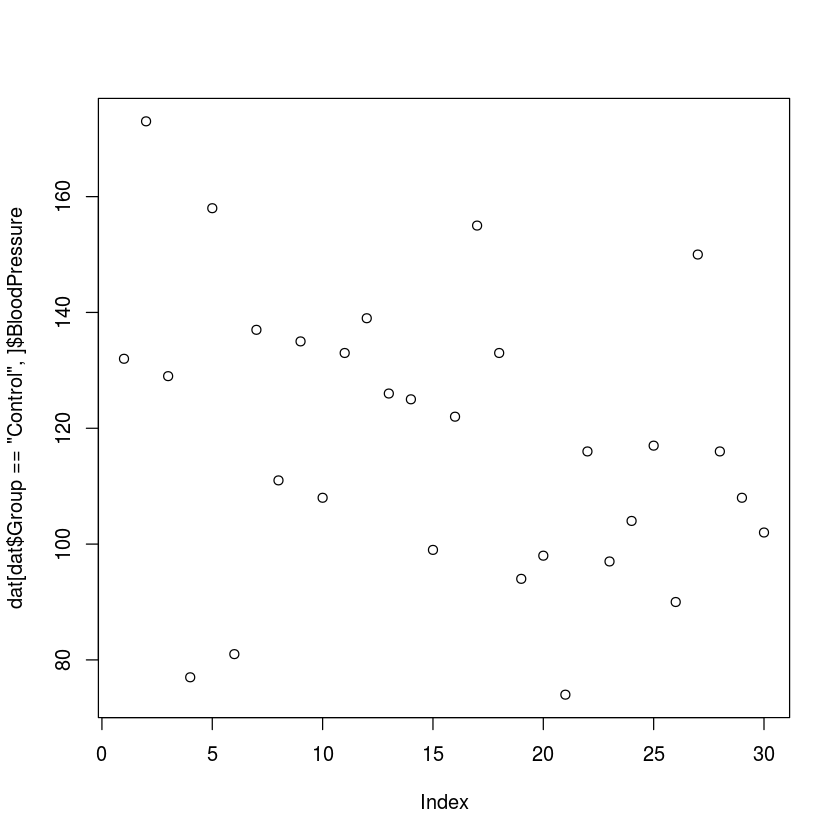

In [264]:
plot(dat[dat$Group == 'Control', ]$BloodPressure)

#### Combining Indexing and Assignment

In [265]:
x <- c(1, 2, 3, 11, 12, 13)
x[x < 10] <- 0
x

[1]  0  0  0 11 12 13

In [268]:
dat[dat$Gender == 'M',]$Gender <- 'm'

In [269]:
dat[dat$Gender == 'M',]$Gender

character(0)

In [270]:
dat[dat$Gender == 'F',]$Gender <- 'f'

In [271]:
dat

ID,Gender,Group,BloodPressure,Age,Aneurisms_q1,Aneurisms_q2,Aneurisms_q3,Aneurisms_q4
Sub001,m,Control,132,16.0,114,140,202,237
Sub002,m,Treatment2,139,17.2,148,209,248,248
Sub003,m,Treatment2,130,19.5,196,251,122,177
Sub004,f,Treatment1,105,15.7,199,140,233,220
Sub005,m,Treatment1,125,19.9,188,120,222,228
Sub006,m,Treatment2,112,14.3,260,266,320,294
Sub007,f,Control,173,17.7,135,98,154,245
Sub008,m,Treatment2,108,19.8,216,238,279,251
Sub009,m,Treatment2,131,19.4,117,215,181,272
Sub010,f,Control,129,18.8,188,144,192,185


### Reading and Writing CSV Files

The most common way that scientists store data is in Excel spreadsheets. While there are R packages designed to access data from Excel spreadsheets (e.g., gdata, RODBC, XLConnect, xlsx, RExcel), users often find it easier to save their spreadsheets in comma-separated values files (CSV) and then use R’s built in functionality to read and manipulate the data.

In [273]:
system('ls', intern = TRUE)

[1] "data"                           "inflammation-01.pdf"           
[3] "inflammation-02.pdf"            "results"                       
[5] "r-novice-inflammation-data.zip"

In [274]:
carSpeeds <- read.csv(file = 'data/car-speeds.csv')

In [275]:
head(carSpeeds)

Color,Speed,State
Blue,32,NewMexico
Red,45,Arizona
Blue,35,Colorado
White,34,Arizona
Red,25,Arizona
Blue,41,Arizona


The default delimiter of the read.csv() function is a comma, but you can use other delimiters by supplying the ‘sep’ argument to the function (e.g., typing sep = ';' allows a semi-colon separated file to be correctly imported -see ?read.csv() for more information on this and other options for working with different file types).

If your data set does not have a header, set the header argument to FALSE:

In [276]:
carSpeeds[1,]

Color,Speed,State
Blue,32,NewMexico


In [277]:
carSpeeds <- read.csv(file = 'data/car-speeds.csv', header = FALSE)

carSpeeds[1, ]

V1,V2,V3
Color,Speed,State


#### The stringsAsFactors Argument

This is perhaps the most important argument in read.csv(), particularly if you are working with categorical data. This is because the default behavior of R is to convert character strings into factors, which may make it difficult to do such things as replace values. For example, let’s say we find out that the data collector was color blind, and accidentally recorded green cars as being blue. In order to correct the data set, let’s replace ‘Blue’ with ‘Green’ in the $Color column:

In [280]:
# Here we will use R's `ifelse` function, in which we provide the test phrase, the outcome if the
# result of the test is 'TRUE', and the outcome if the result is 'FALSE'. We will also assign
# the results to the Color column, using '<-'

# First - reload the data with a header
carSpeeds <- read.csv(file = 'data/car-speeds.csv')

carSpeeds$Color <- ifelse(carSpeeds$Color == 'Blue', 'Green', carSpeeds$Color)
carSpeeds$Color

[1] "Green" "4"     "Green" "5"     "3"     "Green" "Green" "1"     "5"    
 [10] "3"     "3"     "5"     "Green" "Green" "1"     "3"     "Green" "Green"
 [19] "5"     "Green" "Green" "Green" "3"     "Green" "3"     "3"     "3"    
 [28] "3"     "5"     "Green" "3"     "5"     "1"     "3"     "1"     "1"    
 [37] "Green" "3"     "1"     "3"     "1"     "1"     "3"     "3"     "5"    
 [46] "1"     "Green" "3"     "3"     "1"     "1"     "3"     "5"     "3"    
 [55] "Green" "Green" "1"     "Green" "5"     "1"     "3"     "Green" "Green"
 [64] "5"     "1"     "3"     "3"     "1"     "Green" "5"     "Green" "3"    
 [73] "5"     "5"     "Green" "Green" "Green" "Green" "Green" "5"     "1"    
 [82] "Green" "5"     "1"     "1"     "3"     "3"     "5"     "5"     "5"    
 [91] "5"     "3"     "3"     "3"     "5"     "1"     "5"     "1"     "1"    
[100] "5"

What happened?!? It looks like ‘Blue’ was replaced with ‘Green’, but every other color was turned into a number (as a character string, given the quote marks before and after). This is because the colors of the cars were loaded as factors, and the factor level was reported following replacement.

Now, let’s load the dataset using stringsAsFactors=FALSE, and see what happens when we try to replace ‘Blue’ with ‘Green’ in the $Color column:



In [282]:
carSpeeds <- read.csv(file = 'data/car-speeds.csv', stringsAsFactors = FALSE)
  
carSpeeds$Color <- ifelse(carSpeeds$Color == 'Blue', 'Green', carSpeeds$Color)
carSpeeds$Color

[1] "Green" " Red"  "Green" "White" "Red"   "Green" "Green" "Black" "White"
 [10] "Red"   "Red"   "White" "Green" "Green" "Black" "Red"   "Green" "Green"
 [19] "White" "Green" "Green" "Green" "Red"   "Green" "Red"   "Red"   "Red"  
 [28] "Red"   "White" "Green" "Red"   "White" "Black" "Red"   "Black" "Black"
 [37] "Green" "Red"   "Black" "Red"   "Black" "Black" "Red"   "Red"   "White"
 [46] "Black" "Green" "Red"   "Red"   "Black" "Black" "Red"   "White" "Red"  
 [55] "Green" "Green" "Black" "Green" "White" "Black" "Red"   "Green" "Green"
 [64] "White" "Black" "Red"   "Red"   "Black" "Green" "White" "Green" "Red"  
 [73] "White" "White" "Green" "Green" "Green" "Green" "Green" "White" "Black"
 [82] "Green" "White" "Black" "Black" "Red"   "Red"   "White" "White" "White"
 [91] "White" "Red"   "Red"   "Red"   "White" "Black" "White" "Black" "Black"
[100] "White"

### The as.is Argument

This is an extension of the stringsAsFactors argument, but gives you control over individual columns. For example, if we want the colors of cars imported as strings, but we want the names of the states imported as factors, we would load the data set as:

In [283]:
carSpeeds <- read.csv(file = 'data/car-speeds.csv', as.is = 1)

# Note, the 1 applies as.is to the first column only

Now we can see that if we try to replace ‘Blue’ with ‘Green’ in the \$Color column everything looks fine, while trying to replace ‘Arizona’ with ‘Ohio’ in the $State column returns the factor numbers for the names of states that we haven’t replaced:



In [284]:
carSpeeds$Color <- ifelse(carSpeeds$Color == 'Blue', 'Green', carSpeeds$Color)
carSpeeds$Color

[1] "Green" " Red"  "Green" "White" "Red"   "Green" "Green" "Black" "White"
 [10] "Red"   "Red"   "White" "Green" "Green" "Black" "Red"   "Green" "Green"
 [19] "White" "Green" "Green" "Green" "Red"   "Green" "Red"   "Red"   "Red"  
 [28] "Red"   "White" "Green" "Red"   "White" "Black" "Red"   "Black" "Black"
 [37] "Green" "Red"   "Black" "Red"   "Black" "Black" "Red"   "Red"   "White"
 [46] "Black" "Green" "Red"   "Red"   "Black" "Black" "Red"   "White" "Red"  
 [55] "Green" "Green" "Black" "Green" "White" "Black" "Red"   "Green" "Green"
 [64] "White" "Black" "Red"   "Red"   "Black" "Green" "White" "Green" "Red"  
 [73] "White" "White" "Green" "Green" "Green" "Green" "Green" "White" "Black"
 [82] "Green" "White" "Black" "Black" "Red"   "Red"   "White" "White" "White"
 [91] "White" "Red"   "Red"   "Red"   "White" "Black" "White" "Black" "Black"
[100] "White"

In [285]:
carSpeeds$State <- ifelse(carSpeeds$State == 'Arizona', 'Ohio', carSpeeds$State)
carSpeeds$State

[1] "3"    "Ohio" "2"    "Ohio" "Ohio" "Ohio" "3"    "2"    "Ohio" "2"   
 [11] "4"    "4"    "4"    "4"    "4"    "3"    "Ohio" "3"    "Ohio" "4"   
 [21] "4"    "4"    "3"    "2"    "2"    "3"    "2"    "4"    "2"    "4"   
 [31] "3"    "2"    "2"    "4"    "2"    "2"    "3"    "Ohio" "4"    "2"   
 [41] "2"    "3"    "Ohio" "4"    "Ohio" "2"    "3"    "3"    "3"    "2"   
 [51] "Ohio" "4"    "4"    "Ohio" "3"    "2"    "4"    "2"    "4"    "4"   
 [61] "4"    "2"    "3"    "2"    "3"    "2"    "3"    "Ohio" "3"    "4"   
 [71] "4"    "2"    "Ohio" "4"    "2"    "2"    "2"    "Ohio" "3"    "Ohio"
 [81] "4"    "2"    "2"    "Ohio" "Ohio" "Ohio" "4"    "Ohio" "4"    "4"   
 [91] "4"    "Ohio" "Ohio" "3"    "2"    "2"    "4"    "3"    "Ohio" "4"

Suppose we want to keep the colors of cars as factors for some other operations we want to perform. Write code for replacing ‘Blue’ with ‘Green’ in the $Color column of the cars dataset without importing the data with stringsAsFactors=FALSE.


In [286]:
carSpeeds <- read.csv(file = 'data/car-speeds.csv')
# Replace 'Blue' with 'Green' in cars$Color without using the stringsAsFactors or as.is arguments
carSpeeds$Color <- ifelse(as.character(carSpeeds$Color) == 'Blue',
                         'Green',
                         as.character(carSpeeds$Color))
# Convert colors back to factors
carSpeeds$Color <- as.factor(carSpeeds$Color)

#### The strip.white Argument 

t is not uncommon for mistakes to have been made when the data were recorded, for example a space (whitespace) may have been inserted before a data value. By default this whitespace will be kept in the R environment, such that ‘\ Red’ will be recognized as a different value than ‘Red’. In order to avoid this type of error, use the strip.white argument. Let’s see how this works by checking for the unique values in the $Color column of our dataset:

Here, the data recorder added a space before the color of the car in one of the cells:

In [288]:
# We use the built in unique() function to extract the unique colors in our dataset

unique(carSpeeds$Color)

[1] Green  Red  White Red   Black
Levels: Black Green Red  Red White

In [289]:
carSpeeds <- read.csv(
  file = 'data/car-speeds.csv',
                      stringsAsFactors = FALSE, 
  strip.white = TRUE ,
  sep = ','
  )

unique(carSpeeds$Color)

[1] "Blue"  "Red"   "White" "Black"

#### Writing into CSV

In [290]:
write.csv(carSpeeds, file = 'data/car-speeds-cleaned.csv')

#### The row.names Agrument

This argument allows us to set the names of the rows in the output data file. R’s default for this argument is TRUE, and since it does not know what else to name the rows for the cars data set, it resorts to using row numbers. To correct this, we can set row.names to FALSE:

In [291]:
write.csv(carSpeeds, file = 'data/car-speeds-cleaned_removed_row_names.csv', row.names = FALSE)

There is also a col.names argument, which can be used to set the column names for a data set without headers. If the data set already has headers (e.g., we used the headers = TRUE argument when importing the data) then a col.names argument will be ignored.

### The na Argument

There are times when we want to specify certain values for NAs in the data set (e.g., we are going to pass the data to a program that only accepts -9999 as a nodata value). In this case, we want to set the NA value of our output file to the desired value, using the na argument. Let’s see how this works:

In [292]:
# First, replace the speed in the 3rd row with NA, by using an index (square brackets to indicate the position of the value we want to replace)
carSpeeds$Speed[3] <- NA
head(carSpeeds)

Color,Speed,State
Blue,32,NewMexico
Red,45,Arizona
Blue,NA,Colorado
White,34,Arizona
Red,25,Arizona
Blue,41,Arizona


In [293]:
write.csv(carSpeeds, file = 'data/car-speeds-cleaned_NA_inserted.csv', row.names = FALSE)

In [294]:
write.csv(carSpeeds,
          file = 'data/car-speeds-cleaned_NA_inserted.csv',
          row.names = FALSE,
          na = '-9999')

#### Understanding Factors

Factors are used to represent categorical data. Factors can be ordered or unordered and are an important class for statistical analysis and for plotting.

Factors are stored as integers, and have labels associated with these unique integers. While factors look (and often behave) like character vectors, they are actually integers under the hood, and you need to be careful when treating them like strings.

Once created, factors can only contain a pre-defined set values, known as levels. By default, R always sorts levels in alphabetical order. For instance, if you have a factor with 2 levels:

In [13]:
sex <- factor(c("male", "female", "female", "male"))

R will assign 1 to the level "female" and 2 to the level "male" (because f comes before m, even though the first element in this vector is "male"). You can check this by using the function levels(), and check the number of levels using nlevels():



In [297]:
levels(sex)

[1] "female" "male"

In [298]:
nlevels(sex)

[1] 2

In [299]:
exercise <- factor(c("l", "n", "n", "i", "l"), levels = c("n", "l", "i"), ordered = TRUE)

We only expect three cathegories (“n”, “l”, “i”). We can order these from least intense to most intense, so let’s use oredered.

In [1]:
food <- factor(c("low", "high", "medium", "high", "low", "medium", "high"))
levels(food)

[1] "high"   "low"    "medium"

In [2]:
food <- factor(food, levels = c("low", "medium", "high"))
levels(food)

[1] "low"    "medium" "high"

In [3]:
min(food) # doesn't work


ERROR: Error in Summary.factor(structure(c(1L, 3L, 2L, 3L, 1L, 2L, 3L), .Label = c("low", : ‘min’ not meaningful for factors


In [4]:
food <- factor(food, levels = c("low", "medium", "high"), ordered = TRUE)
levels(food)

[1] "low"    "medium" "high"

In [5]:
min(food) # works!

[1] low
Levels: low < medium < high

In R’s memory, these factors are represented by numbers (1, 2, 3). They are better than using simple integer labels because factors are self describing: "low", "medium", and "high"” is more descriptive than 1, 2, 3. Which is low? You wouldn’t be able to tell with just integer data. Factors have this information built in. It is particularly helpful when there are many levels (like the subjects in our example data set).

You have a vector representing levels of exercise undertaken by 5 subjects

“l”,”n”,”n”,”i”,”l” ; n=none, l=light, i=intense

What is the best way to represent this in R?



d) exercise <- factor(c(“l”, “n”, “n”, “i”, “l”), levels = c(“n”, “l”, “i”), ordered = TRUE)

#### Converting Factors

In [7]:
f <- factor(c(3.4,1.2,5))
as.numeric(f)`

[1] 2 1 3

This does not behave as expected (and there is no warning).

The recommended way is to use the integer vector to index the factor levels:


In [8]:
levels(f)

[1] "1.2" "3.4" "5"

In [9]:
levels(f)[f]

[1] "3.4" "1.2" "5"

This returns a character vector, the as.numeric() function is still required to convert the values to the proper type (numeric).

In [10]:
f <- levels(f)[f]
f <- as.numeric(f)

In [11]:
f

[1] 3.4 1.2 5.0

https://www.listendata.com/2015/05/converting-multiple-numeric-variables.html

https://stackoverflow.com/questions/9251326/convert-data-frame-column-format-from-character-to-factor

In [14]:
str(sex)

 Factor w/ 2 levels "female","male": 2 1 1 2


In [15]:
?read.csv

In [17]:
dat <- read.csv(file = 'r-novice-inflammation/data/sample.csv', stringsAsFactors = TRUE)

stringsAsFactors=TRUE is the default behavior for R. We could leave this argument out. It is included here for clarity.

In [18]:
str(dat)

'data.frame':	100 obs. of  9 variables:
 $ ID           : Factor w/ 100 levels "Sub001","Sub002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Gender       : Factor w/ 4 levels "f","F","m","M": 3 3 3 1 3 4 1 3 3 1 ...
 $ Group        : Factor w/ 3 levels "Control","Treatment1",..: 1 3 3 2 2 3 1 3 3 1 ...
 $ BloodPressure: int  132 139 130 105 125 112 173 108 131 129 ...
 $ Age          : num  16 17.2 19.5 15.7 19.9 14.3 17.7 19.8 19.4 18.8 ...
 $ Aneurisms_q1 : int  114 148 196 199 188 260 135 216 117 188 ...
 $ Aneurisms_q2 : int  140 209 251 140 120 266 98 238 215 144 ...
 $ Aneurisms_q3 : int  202 248 122 233 222 320 154 279 181 192 ...
 $ Aneurisms_q4 : int  237 248 177 220 228 294 245 251 272 185 ...


Notice the first 3 columns have been converted to factors. These values were text in the data file so R automatically interpreted them as categorical variables.

In [19]:
summary(dat)

       ID     Gender        Group    BloodPressure        Age       
 Sub001 : 1   f:35   Control   :30   Min.   : 62.0   Min.   :12.10  
 Sub002 : 1   F: 4   Treatment1:35   1st Qu.:107.5   1st Qu.:14.78  
 Sub003 : 1   m:46   Treatment2:35   Median :117.5   Median :16.65  
 Sub004 : 1   M:15                   Mean   :118.6   Mean   :16.42  
 Sub005 : 1                          3rd Qu.:133.0   3rd Qu.:18.30  
 Sub006 : 1                          Max.   :173.0   Max.   :20.00  
 (Other):94                                                         
  Aneurisms_q1    Aneurisms_q2    Aneurisms_q3    Aneurisms_q4  
 Min.   : 65.0   Min.   : 80.0   Min.   :105.0   Min.   :116.0  
 1st Qu.:118.0   1st Qu.:131.5   1st Qu.:182.5   1st Qu.:186.8  
 Median :158.0   Median :162.5   Median :217.0   Median :219.0  
 Mean   :158.8   Mean   :168.0   Mean   :219.8   Mean   :217.9  
 3rd Qu.:188.0   3rd Qu.:196.8   3rd Qu.:248.2   3rd Qu.:244.2  
 Max.   :260.0   Max.   :283.0   Max.   :323.0   Max.   :3

The summary() function is a great way of spotting errors in your data (look at the dat$Gender column). It’s also a great way for spotting missing data.

In [20]:
table(dat$Group)


   Control Treatment1 Treatment2 
        30         35         35 

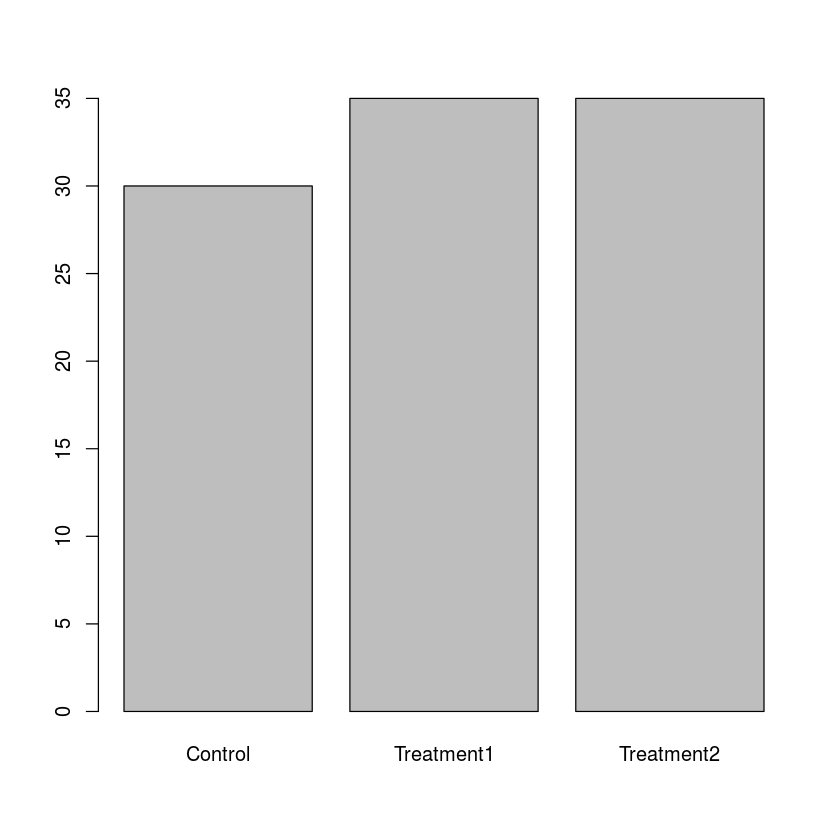

In [21]:
barplot(table(dat$Group))

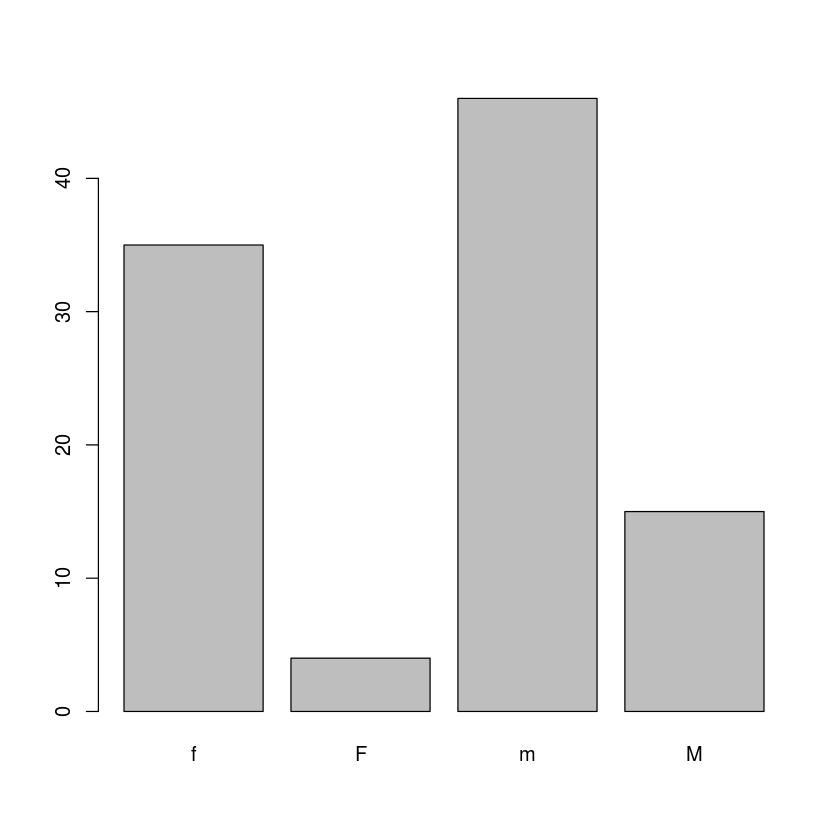

In [22]:
barplot(table(dat$Gender))

In [27]:
dat$Gender[dat$Gender == 'M'] <- 'm'
dat$Gender[dat$Gender == 'F'] <- 'f'

In [28]:
dat$Gender <- factor(dat$Gender)

In [29]:
dat$Gender

[1] m m m f m m f m m f m f f m m m f m m f f m f f m m m f m f f m m m m f f
 [38] m m m f m m m f f m m m m m f f f m f m m m f f f f m f m f f m m m m f m
 [75] m f m m m f m m m m m f f f m m f m f f m m f m m m
Levels: f m

For dropping levels from all factor columns in a dataframe, you can use:

subdf <- subset(df, numbers <= 3)
subdf[] <- lapply(subdf, function(x) if(is.factor(x)) factor(x) else x)

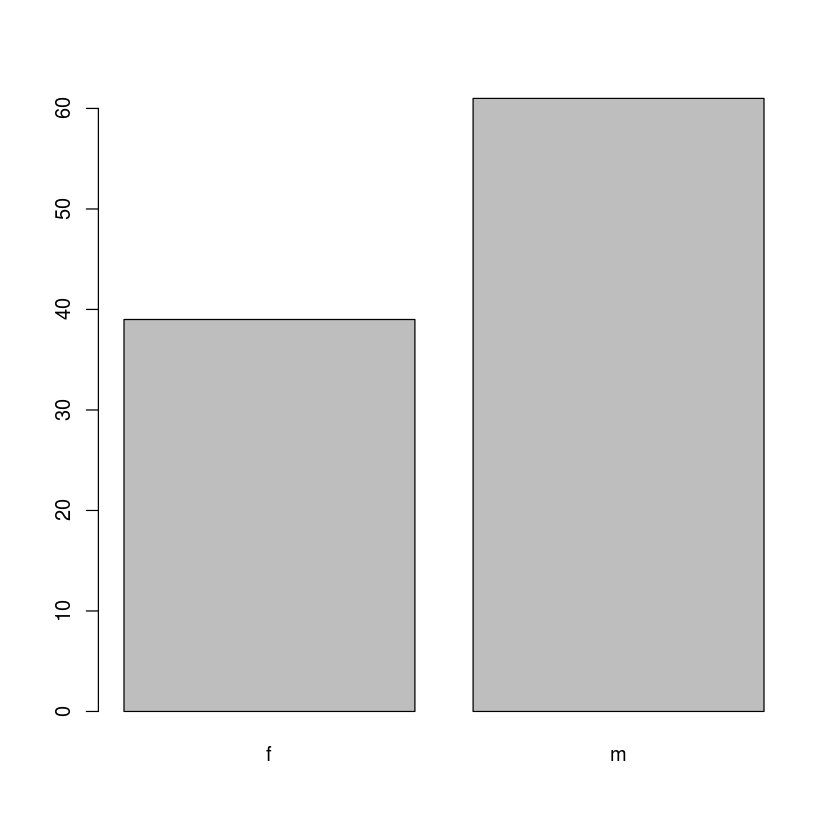

In [30]:
barplot(table(dat$Gender))

Since R version 2.12, there's a droplevels() function.

levels(droplevels(subdf$letters))

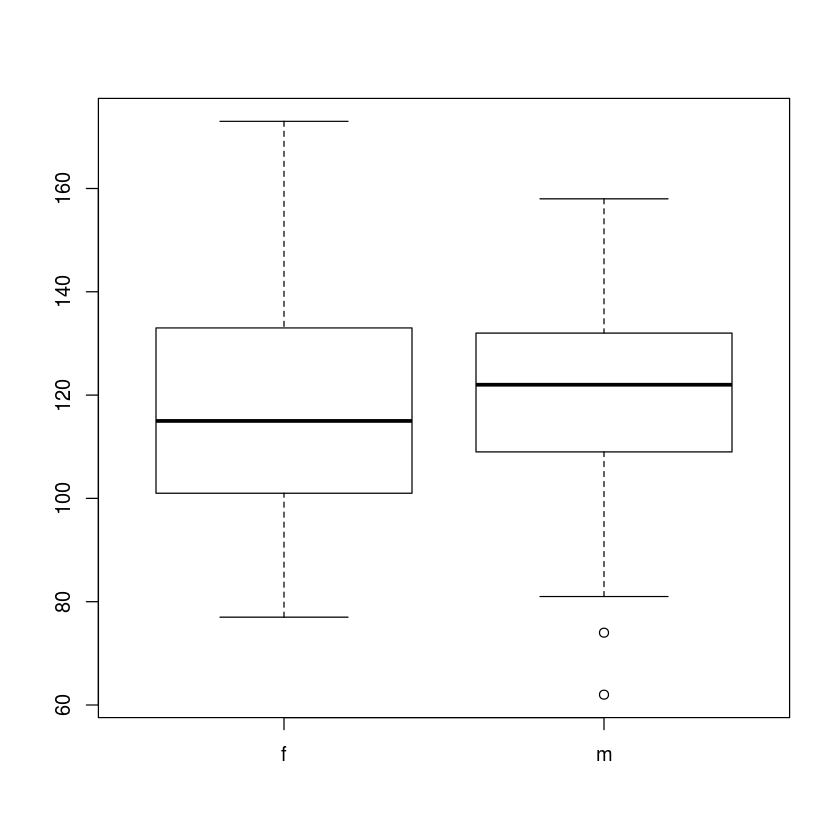

In [31]:
plot(x = dat$Gender, y = dat$BloodPressure)

#### Data Types and Structures

Everything in R is an object.

R has 6 (although we will not discuss the raw class for this workshop) atomic vector types.

character

numeric (real or decimal)

integer

logical

complex

By atomic, we mean the vector only holds data of a single type.

character: "a", "swc"

numeric: 2, 15.5

integer: 2L (the L tells R to store this as an 

integer)

logical: TRUE, FALSE

complex: 1+4i (complex numbers with real and imaginary parts)

R provides many functions to examine features of vectors and other objects, for example

class() - what kind of object is it (high-level)?

typeof() - what is the object’s data type (low-level)?

length() - how long is it? What about two dimensional objects?

attributes() - does it have any metadata?

In [33]:
y <- 1:10
y

[1]  1  2  3  4  5  6  7  8  9 10

In [34]:
typeof(y)

[1] "integer"

In [35]:
z <- as.numeric(y)
typeof(z)

[1] "double"

R has many data structures. These include

atomic vector

list

matrix

data frame

factors

vector() # an empty 'logical' (the default) vector

In [36]:
vector() # an empty 'logical' (the default) vector

logical(0)

In [37]:
vector("character", length = 5) # a vector of mode 'character' with 5 elements

[1] "" "" "" "" ""

In [38]:
character(5) # the same thing, but using the constructor directly

[1] "" "" "" "" ""

In [39]:
numeric(5)   # a numeric vector with 5 elements

[1] 0 0 0 0 0

In [40]:
logical(5)   # a logical vector with 5 elements

[1] FALSE FALSE FALSE FALSE FALSE

You can also create vectors by directly specifying their content. R will then guess the appropriate mode of storage for the vector. For instance:

x <- c(1, 2, 3)

In [42]:
x <- c(1, 2, 3,1,2,3,4,4,2,1)

In [43]:
x<- as.character(x)

In [44]:
x

[1] "1" "2" "3" "1" "2" "3" "4" "4" "2" "1"

In [45]:
x <- as.factor(x)

In [46]:
x

[1] 1 2 3 1 2 3 4 4 2 1
Levels: 1 2 3 4

In [56]:
z <- c("Sarah", "Tracy", "Jon")

In [57]:
z <- c(z, "Annette")

In [58]:
z

[1] "Sarah"   "Tracy"   "Jon"     "Annette"

In [59]:
z <- c("Greg", z)
z

[1] "Greg"    "Sarah"   "Tracy"   "Jon"     "Annette"

In [60]:
series <- 1:10
seq(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [61]:
seq(from = 1, to = 10, by = 0.1)

[1]  1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  2.4
[16]  2.5  2.6  2.7  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
[31]  4.0  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.0  5.1  5.2  5.3  5.4
[46]  5.5  5.6  5.7  5.8  5.9  6.0  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
[61]  7.0  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.0  8.1  8.2  8.3  8.4
[76]  8.5  8.6  8.7  8.8  8.9  9.0  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9
[91] 10.0

#### Misssing Data

R supports missing data in vectors. They are represented as NA (Not Available) and can be used for all the vector types covered in this lesson:

In [62]:
x <- c("a", NA, "c", "d", NA)
y <- c("a", "b", "c", "d", "e")
is.na(x)

[1] FALSE  TRUE FALSE FALSE  TRUE

In [63]:
is.na(y)

[1] FALSE FALSE FALSE FALSE FALSE

In [64]:
anyNA(x)

[1] TRUE

In [65]:
anyNA(y)

[1] FALSE

In [66]:
nchar("Software Carpentry")

[1] 18

In [67]:
length(1:10)

[1] 10

In [68]:
m <- matrix(nrow =2, ncol = 2)

In [69]:
m

NA,NA
NA,NA


In [70]:
dim(m)

[1] 2 2

In [75]:
m <- 1:10
dim(m) <- c(2,5)

In [76]:
m

1,3,5,7,9
2,4,6,8,10


In [77]:
m <- matrix(1:6, nrow = 2, ncol = 3)

In [78]:
m

1,3,5
2,4,6


In [79]:
x <- 1:3
y <- 10:12
cbind(x, y)

x,y
1,10
2,11
3,12


In [80]:
rbind(x, y)

x,1,2,3
y,10,11,12


In [81]:
mdat <- matrix(c(1, 2, 3, 11, 12, 13),
               nrow = 2,
               ncol = 3,
               byrow = TRUE)
mdat

1,2,3
11,12,13


In R lists act as containers. Unlike atomic vectors, the contents of a list are not restricted to a single mode and can encompass any mixture of data types. Lists are sometimes called generic vectors, because the elements of a list can by of any type of R object, even lists containing further lists. This property makes them fundamentally different from atomic vectors.

In [82]:
x <- vector("list", length = 5) # empty list
length(x)


[1] 5

Create lists using list() or coerce other objects using as.list(). An empty list of the required length can be created using vector()

In [84]:
x <- list(1, "a", TRUE, 1+4i)
x

[[1]]
[1] 1

[[2]]
[1] "a"

[[3]]
[1] TRUE

[[4]]
[1] 1+4i

In [85]:
x <- vector("list", length = 5) # empty list
length(x)

[1] 5

In [86]:
x

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

In [87]:
x[[1]]

NULL

In [88]:
#Vectors can be coerced to lists as follows:

x <- 1:10
x <- as.list(x)
length(x)

[1] 10

#### Data Frame

In [89]:
dat <- data.frame(id = letters[1:10], x = 1:10, y = 11:20)

In [90]:
dat

id,x,y
a,1,11
b,2,12
c,3,13
d,4,14
e,5,15
f,6,16
g,7,17
h,8,18
i,9,19
j,10,20


Useful Data Frame Functions

head() - shows first 6 rows

tail() - shows last 6 rows

dim() - returns the dimensions of data frame (i.e. 

number of rows and number of columns)

nrow() - number of rows

ncol() - number of columns

str() - structure of data frame - name, type and 
preview of data in each column

names() - shows the names attribute for a data frame, which gives the column names.

sapply(dataframe, class) - shows the class of each column in the data frame

#### Loops in R

In R you have multiple options when repeating calculations: vectorized operations, for loops, and apply functions.

In [92]:
filenames <- list.files(path = "r-novice-inflammation//data", pattern = "inflammation-[0-9]{2}.csv", full.names = TRUE)

In [93]:
filenames

[1] "r-novice-inflammation//data/inflammation-01.csv"
 [2] "r-novice-inflammation//data/inflammation-02.csv"
 [3] "r-novice-inflammation//data/inflammation-03.csv"
 [4] "r-novice-inflammation//data/inflammation-04.csv"
 [5] "r-novice-inflammation//data/inflammation-05.csv"
 [6] "r-novice-inflammation//data/inflammation-06.csv"
 [7] "r-novice-inflammation//data/inflammation-07.csv"
 [8] "r-novice-inflammation//data/inflammation-08.csv"
 [9] "r-novice-inflammation//data/inflammation-09.csv"
[10] "r-novice-inflammation//data/inflammation-10.csv"
[11] "r-novice-inflammation//data/inflammation-11.csv"
[12] "r-novice-inflammation//data/inflammation-12.csv"

In [94]:
a <- 1:10
b <- 1:10
a + b

[1]  2  4  6  8 10 12 14 16 18 20

Vector Recycling
When performing vector operations in R, it is important to know about recycling. If you perform an operation on two or more vectors of unequal length, R will recycle elements of the shorter vector(s) to match the longest vector. For example:

In [95]:
a <- 1:10
b <- 1:5
a + b

[1]  2  4  6  8 10  7  9 11 13 15

The elements of a and b are added together starting from the first element of both vectors. When R reaches the end of the shorter vector b, it starts again at the first element of b and continues until it reaches the last element of the longest vector a. This behaviour may seem crazy at first glance, but it is very useful when you want to perform the same operation on every element of a vector. For example, say we want to multiply every element of our vector a by 5:



In [96]:
a <- 1:10
b <- 5
a * b


[1]  5 10 15 20 25 30 35 40 45 50

When the length of the longer object is a multiple of the shorter object length (as in our example above), the recycling occurs silently. When the longer object length is not a multiple of the shorter object length, a warning is given:

In [98]:
a <- 1:10
b <- 1:7
a + b

Warning message in a + b:
“longer object length is not a multiple of shorter object length”

[1]  2  4  6  8 10 12 14  9 11 13

#### for or apply

A for loop is used to apply the same function calls to a collection of objects. R has a family of functions, the apply family, which can be used in much the same way. You’ve already used one of the family, apply in the first lesson. The apply family members include

apply - apply over the margins of an array (e.g. the rows or columns of a matrix)

lapply - apply over an object and return list

sapply - apply over an object and return a simplified object (an array) if possible

vapply - similar to sapply but you specify the type of object returned by the iterations


https://bianalystblog.wordpress.com/2013/07/13/r-grouping-functions-sapply-vs-lapply-vs-apply-vs-tapply-vs-by-vs-aggregate-vs-plyr/

http://swcarpentry.github.io/r-novice-inflammation/15-supp-loops-in-depth/